<a href="https://colab.research.google.com/github/Saul-Ochoa/Clasificaci-n-de-Predicci-n-Salarial/blob/main/Salary_Predicti%C3%B3n_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de Precios de móviles

**Sobre la base:**

La extracción fue realizada por Barry Becker de la base de datos del censo de 1994.
• age: continuous.

• workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

• fnlwgt: continuous.

• education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

• education-num: continuous.

• marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

• occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Profspecialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

• relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

• race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

• sex: Female, Male.

• capital-gain: continuous.

• capital-loss: continuous.

• hours-per-week: continuous.

• native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

• salary: <=50K or >50K

**Objetivo:**

La tarea de predicción es determinar si una persona gana más de 50K al año


In [586]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [587]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [588]:
url='/content/drive/MyDrive/DMC Machine Learning/semana8/Prediccion de Salario/salary.csv'

In [589]:
df=pd.read_csv(url,sep=',')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [590]:
df.shape

(32561, 15)

In [591]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [592]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [593]:
df.sample(50)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7140,47,Private,118972,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,>50K
24450,35,Private,77146,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,>50K
23108,30,Local-gov,102130,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
2479,55,Private,66356,HS-grad,9,Separated,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,<=50K
24045,36,Private,107916,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,2002,40,United-States,<=50K
28297,29,Private,59732,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
29195,48,Private,155509,HS-grad,9,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,16,Trinadad&Tobago,<=50K
26841,25,Private,299908,Some-college,10,Married-civ-spouse,Exec-managerial,Wife,Black,Female,0,0,40,United-States,>50K
20801,43,Self-emp-inc,244945,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,<=50K
8473,29,Private,147755,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1672,40,United-States,<=50K


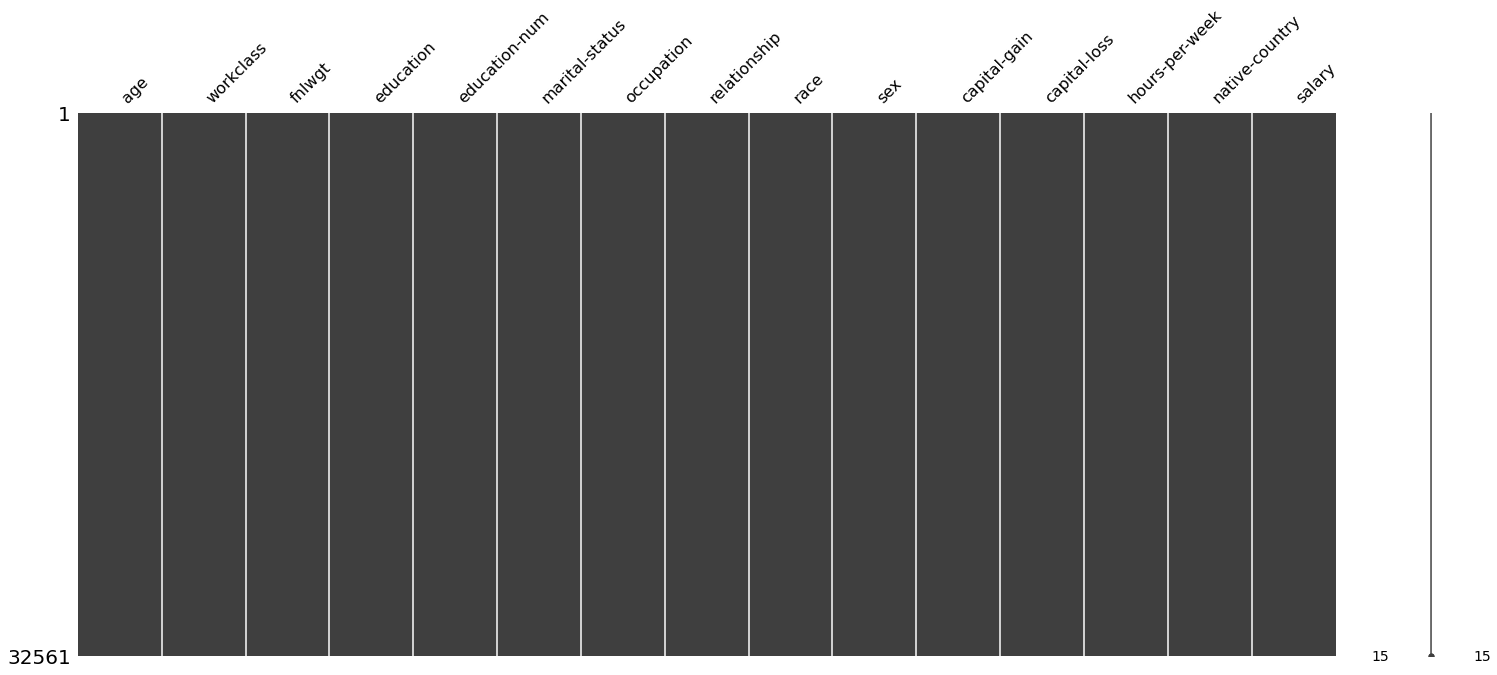

In [594]:
msno.matrix(df)  #No hay valores nulos, pero hya valores con ?

In [595]:
#msno.dendrogram(df)

**Remplazar '?' con la columna native-country con el Nan**

In [596]:
df=df.replace(to_replace = '%?%', value = np.nan)

In [597]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [598]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

# **Columnas categoricas y numericas**

In [599]:
columna=df.columns

In [600]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [601]:
columna

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [602]:
#Columnas numericas
columna_numerica=list(df.select_dtypes(include=['int64']).columns)
columna_numerica

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [603]:
len(columna_numerica)

6

In [604]:
#Columnas categorica
columna_categorica=list(df.select_dtypes(include=['object']).columns)
columna_categorica

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'salary']

In [605]:
len(columna_categorica)

9

# Exploramiento de la Data

In [606]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [607]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


# Analizar a las columnas categoricas

In [608]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [609]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

<Figure size 1080x720 with 0 Axes>

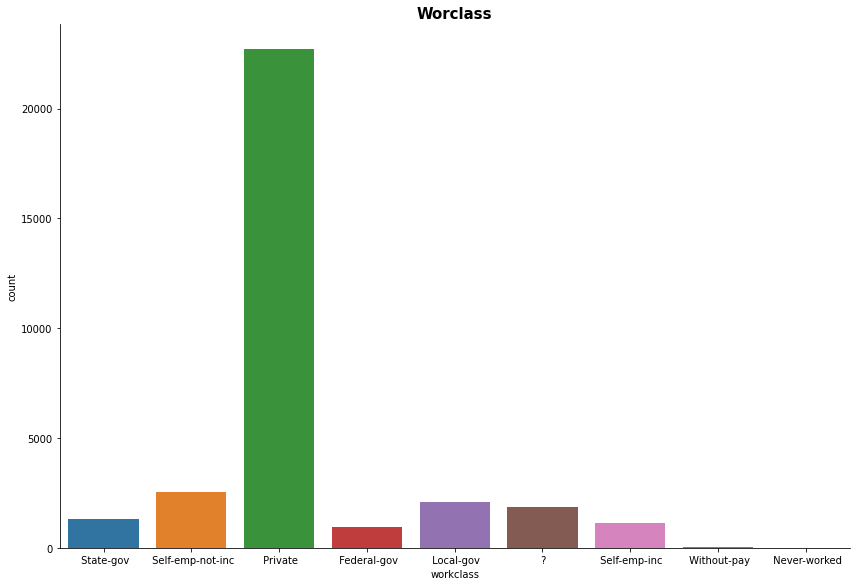

In [610]:
plt.figure(figsize=(15,10))
sns.catplot('workclass',data=df,kind='count',height=8,aspect=1.5)
plt.title('Worclass',fontweight='bold',fontname='Times New Roman',fontsize=15)
plt.show()

In [611]:
df.groupby(['workclass','salary']).size()

workclass          salary
 ?                  <=50K     1645
                    >50K       191
 Federal-gov        <=50K      589
                    >50K       371
 Local-gov          <=50K     1476
                    >50K       617
 Never-worked       <=50K        7
 Private            <=50K    17733
                    >50K      4963
 Self-emp-inc       <=50K      494
                    >50K       622
 Self-emp-not-inc   <=50K     1817
                    >50K       724
 State-gov          <=50K      945
                    >50K       353
 Without-pay        <=50K       14
dtype: int64

<Figure size 1080x720 with 0 Axes>

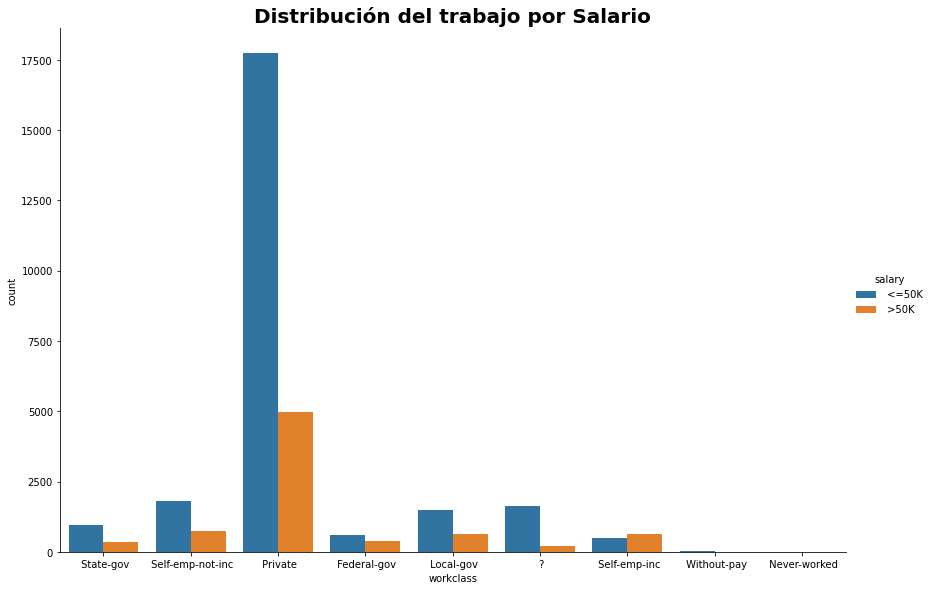

In [612]:
plt.figure(figsize = (15,10))
sns.catplot('workclass',data=df,kind='count',hue='salary',height=8,aspect=1.5)
plt.title('Distribución del trabajo por Salario',fontweight='bold',fontname='Times New Roman', fontsize=20)
plt.show()

In [613]:
columna_categorica

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'salary']

In [614]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

<Figure size 720x720 with 0 Axes>

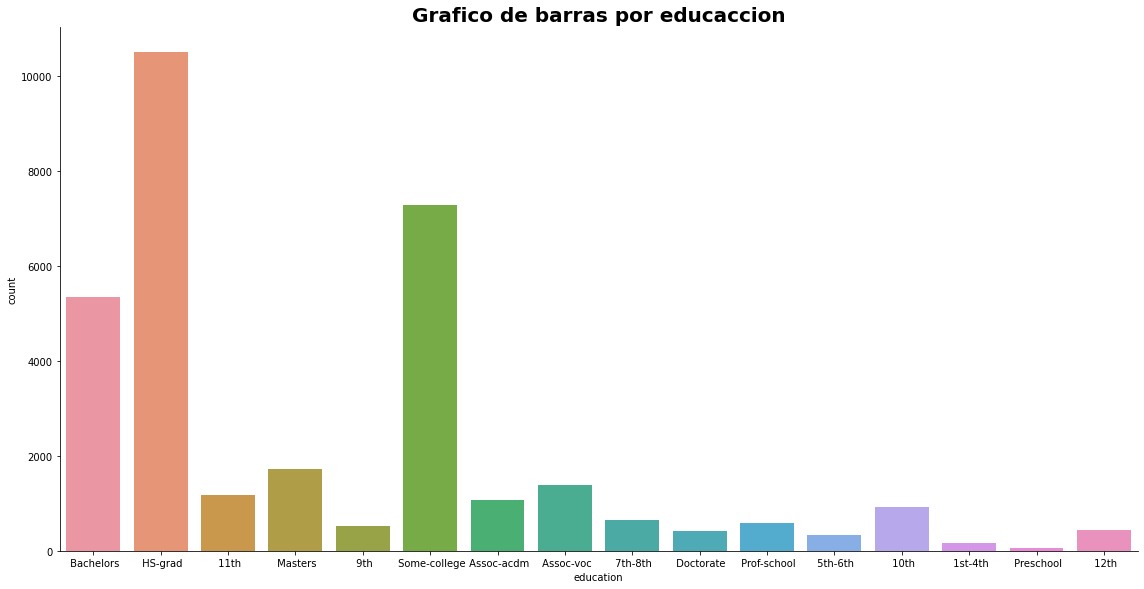

In [615]:
plt.figure(figsize=(10,10))
sns.catplot('education',data=df,kind='count',height=8,aspect=2.0)
plt.title('Grafico de barras por educaccion',fontweight='bold',fontname='Times New Roman',fontsize=20)
plt.show()

In [616]:
#las personas con mayor educacion  tienen mas posibilidades de ganar 50 mil soles
df.groupby(['education','salary']).size()

education      salary
 10th           <=50K     871
                >50K       62
 11th           <=50K    1115
                >50K       60
 12th           <=50K     400
                >50K       33
 1st-4th        <=50K     162
                >50K        6
 5th-6th        <=50K     317
                >50K       16
 7th-8th        <=50K     606
                >50K       40
 9th            <=50K     487
                >50K       27
 Assoc-acdm     <=50K     802
                >50K      265
 Assoc-voc      <=50K    1021
                >50K      361
 Bachelors      <=50K    3134
                >50K     2221
 Doctorate      <=50K     107
                >50K      306
 HS-grad        <=50K    8826
                >50K     1675
 Masters        <=50K     764
                >50K      959
 Preschool      <=50K      51
 Prof-school    <=50K     153
                >50K      423
 Some-college   <=50K    5904
                >50K     1387
dtype: int64

<Figure size 1080x720 with 0 Axes>

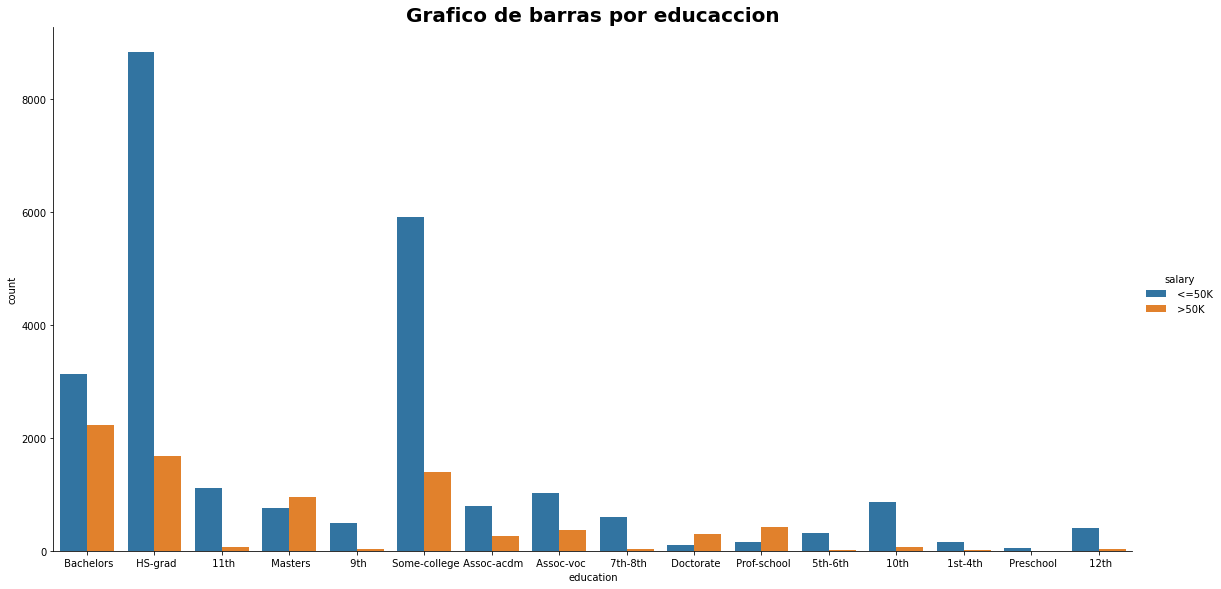

In [617]:
plt.figure(figsize=(15,10))
sns.catplot('education',data=df,kind='count',height=8,aspect=2.0,hue='salary')
plt.title('Grafico de barras por educaccion',fontweight='bold',fontname='Times New Roman',fontsize=20)
plt.show()

In [618]:
columna_categorica

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'salary']

In [619]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [620]:
df.groupby(['marital-status','workclass']).size()

marital-status          workclass        
 Divorced                ?                    184
                         Federal-gov          168
                         Local-gov            369
                         Never-worked           1
                         Private             3119
                         Self-emp-inc         100
                         Self-emp-not-inc     292
                         State-gov            210
 Married-AF-spouse       ?                      2
                         Federal-gov            3
                         Private               15
                         Self-emp-not-inc       2
                         State-gov              1
 Married-civ-spouse      ?                    636
                         Federal-gov          471
                         Local-gov           1023
                         Never-worked           1
                         Private             9732
                         Self-emp-inc         837
        

In [621]:
#las personas que son casados y sin conyugue son las personas que ganan mas de 50 mil dolares
df.groupby(['marital-status','salary']).size()

marital-status          salary
 Divorced                <=50K     3980
                         >50K       463
 Married-AF-spouse       <=50K       13
                         >50K        10
 Married-civ-spouse      <=50K     8284
                         >50K      6692
 Married-spouse-absent   <=50K      384
                         >50K        34
 Never-married           <=50K    10192
                         >50K       491
 Separated               <=50K      959
                         >50K        66
 Widowed                 <=50K      908
                         >50K        85
dtype: int64

In [622]:
#el total de encuestados proviene de 29170
df['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [623]:
df.groupby(['native-country','salary']).size()

native-country  salary
 ?               <=50K     437
                 >50K      146
 Cambodia        <=50K      12
                 >50K        7
 Canada          <=50K      82
                          ... 
 United-States   >50K     7171
 Vietnam         <=50K      62
                 >50K        5
 Yugoslavia      <=50K      10
                 >50K        6
Length: 82, dtype: int64

<Figure size 1080x1080 with 0 Axes>

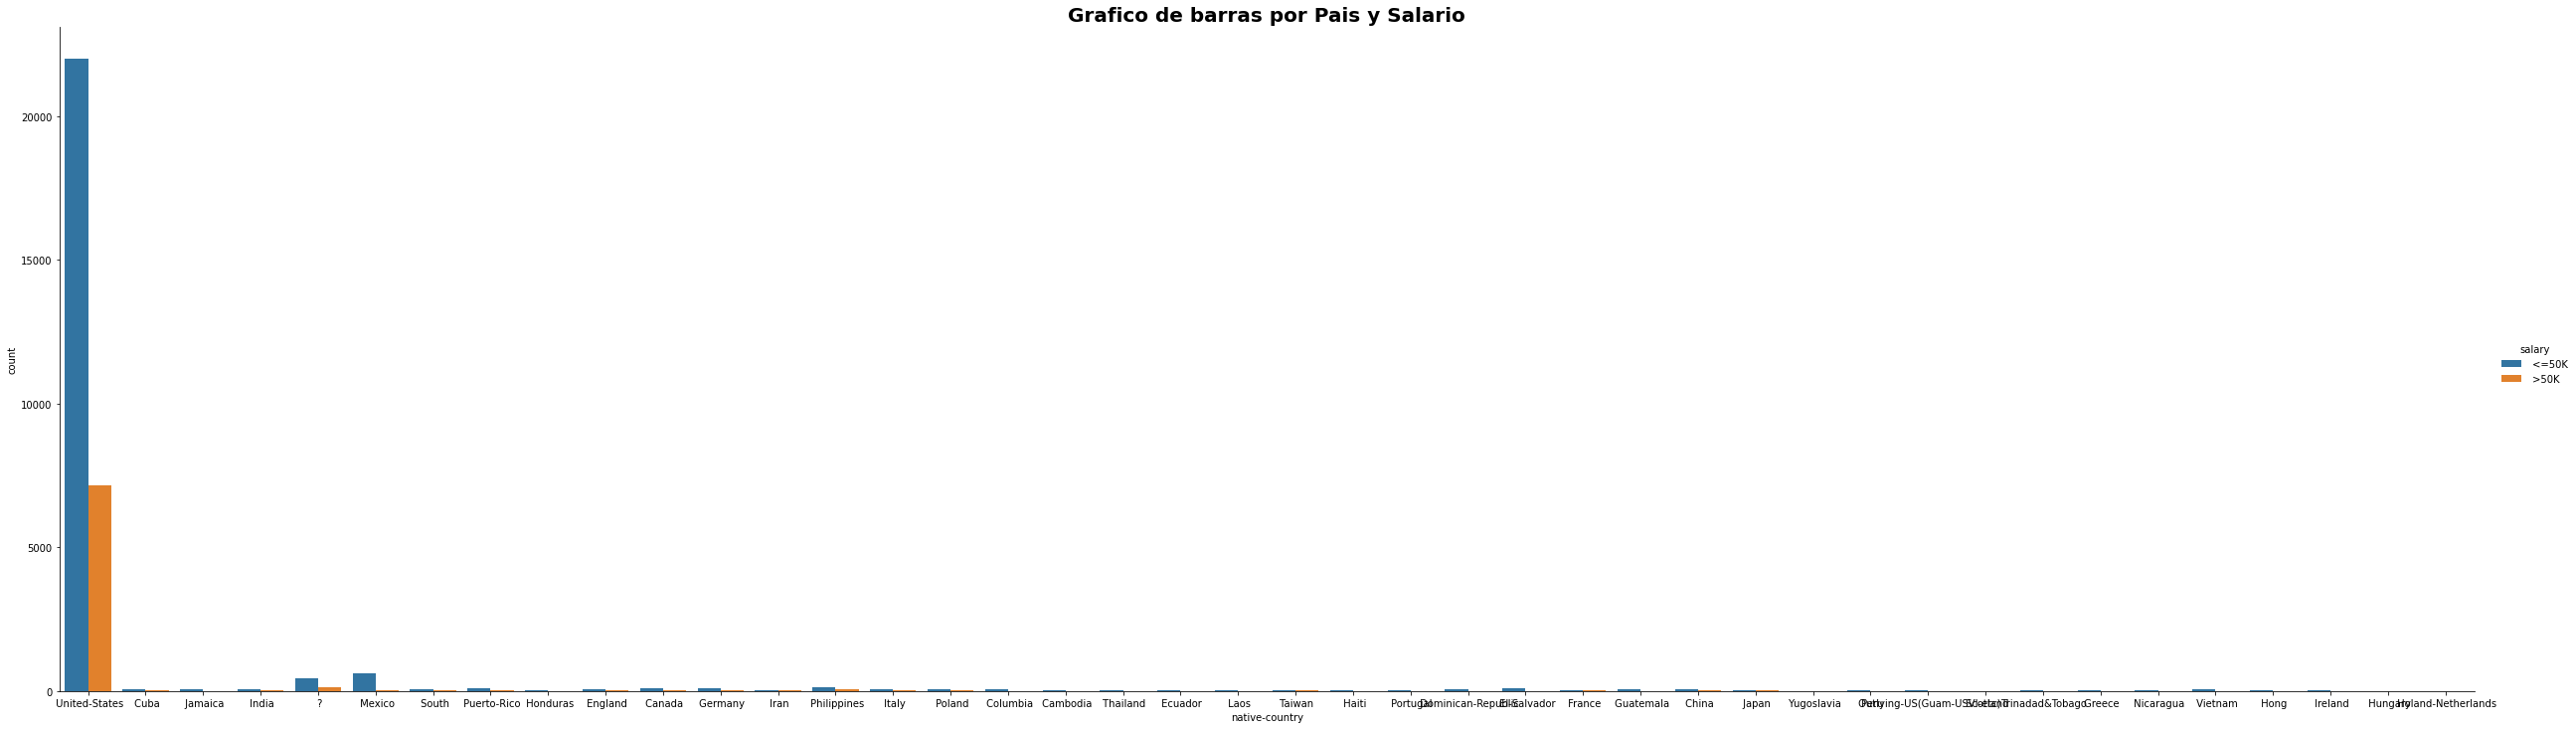

In [624]:
#las personas de estados unidos en su mayoria ganan mas de 50 mil dolares
plt.figure(figsize=(15,15))
sns.catplot('native-country',data=df,kind='count',height=10,aspect=3.5,hue='salary')
plt.title('Grafico de barras por Pais y Salario',fontweight='bold',fontname='Times New Roman',fontsize=20)
plt.show()

In [625]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [626]:
df.groupby(['occupation','salary']).size()

occupation          salary
 ?                   <=50K    1652
                     >50K      191
 Adm-clerical        <=50K    3263
                     >50K      507
 Armed-Forces        <=50K       8
                     >50K        1
 Craft-repair        <=50K    3170
                     >50K      929
 Exec-managerial     <=50K    2098
                     >50K     1968
 Farming-fishing     <=50K     879
                     >50K      115
 Handlers-cleaners   <=50K    1284
                     >50K       86
 Machine-op-inspct   <=50K    1752
                     >50K      250
 Other-service       <=50K    3158
                     >50K      137
 Priv-house-serv     <=50K     148
                     >50K        1
 Prof-specialty      <=50K    2281
                     >50K     1859
 Protective-serv     <=50K     438
                     >50K      211
 Sales               <=50K    2667
                     >50K      983
 Tech-support        <=50K     645
                     >50K   

<Figure size 1080x1080 with 0 Axes>

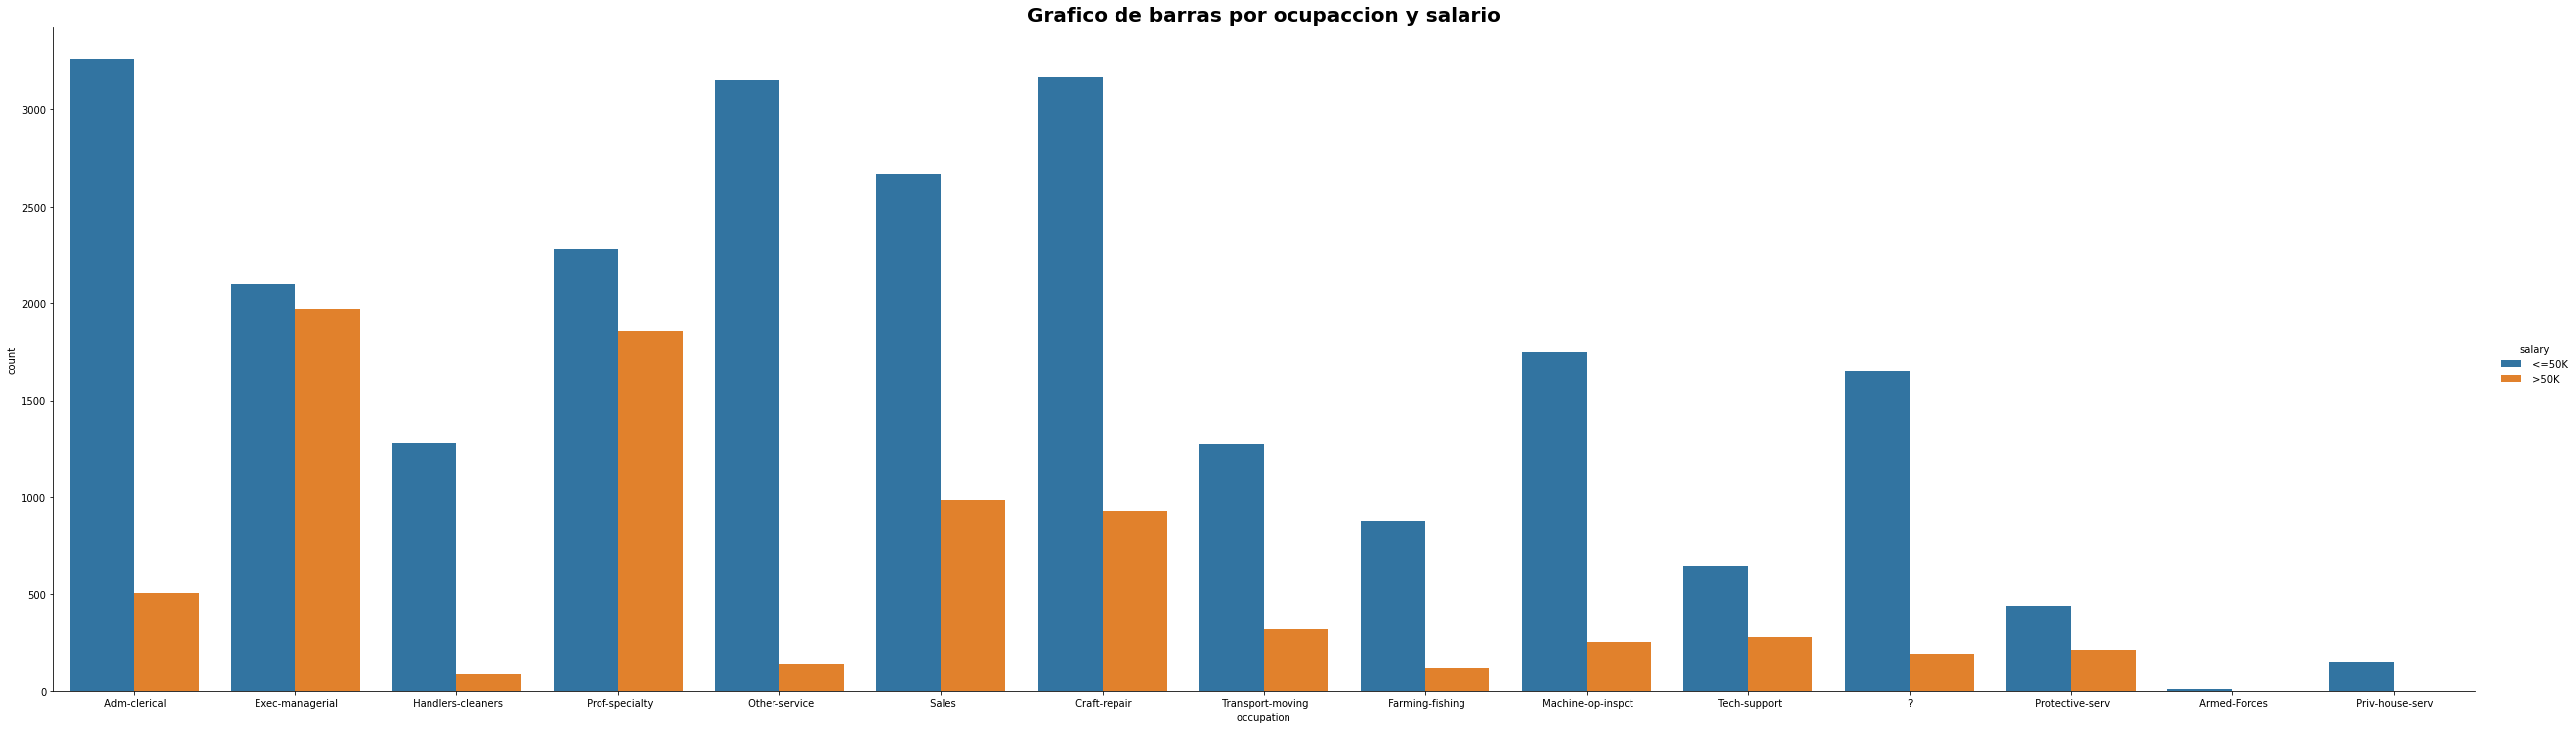

In [627]:
plt.figure(figsize=(15,15))
sns.catplot('occupation',data=df,kind='count',height=10,aspect=3.5,hue='salary')
plt.title('Grafico de barras por ocupaccion y salario',fontweight='bold',fontname='Times New Roman',fontsize=20)
plt.show()

In [628]:
#el total de encuestado de mayor cantidad son de raza blanca.
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

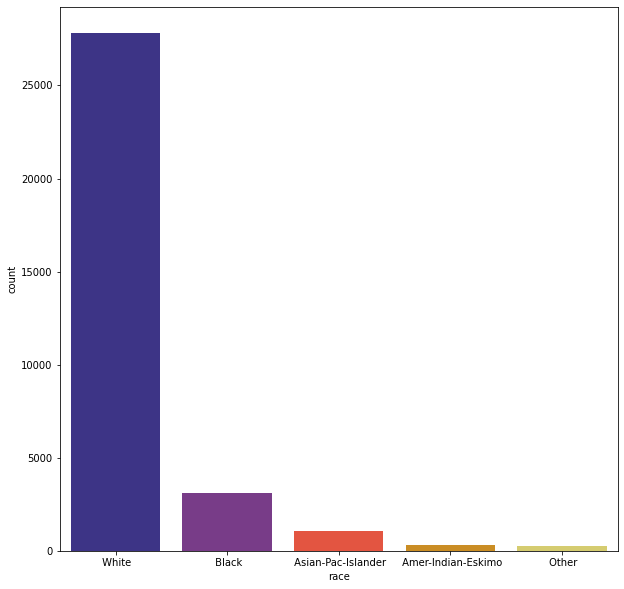

In [629]:
plt.figure(figsize=(10,10))
sns.countplot(df['race'],palette='CMRmap')
plt.show()

In [630]:
df.groupby(['race','salary']).size()

race                 salary
 Amer-Indian-Eskimo   <=50K      275
                      >50K        36
 Asian-Pac-Islander   <=50K      763
                      >50K       276
 Black                <=50K     2737
                      >50K       387
 Other                <=50K      246
                      >50K        25
 White                <=50K    20699
                      >50K      7117
dtype: int64

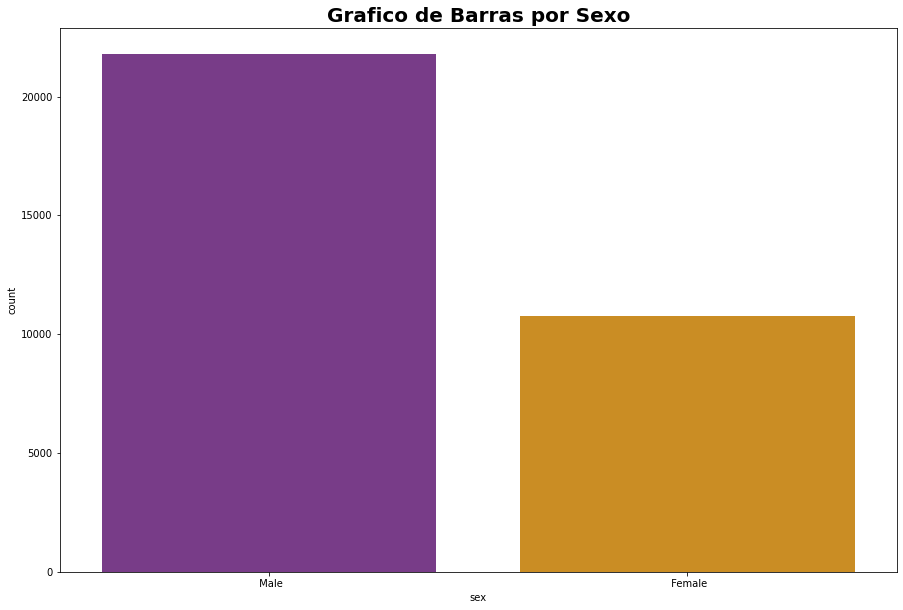

In [631]:
plt.figure(figsize=(15,10))
sns.countplot(df['sex'],palette='CMRmap')
plt.title('Grafico de Barras por Sexo', fontweight='bold',fontname='Times New Roman',fontsize=20)
plt.show()

In [632]:
df.groupby(['sex','salary']).size()

sex      salary
 Female   <=50K     9592
          >50K      1179
 Male     <=50K    15128
          >50K      6662
dtype: int64

<Figure size 720x720 with 0 Axes>

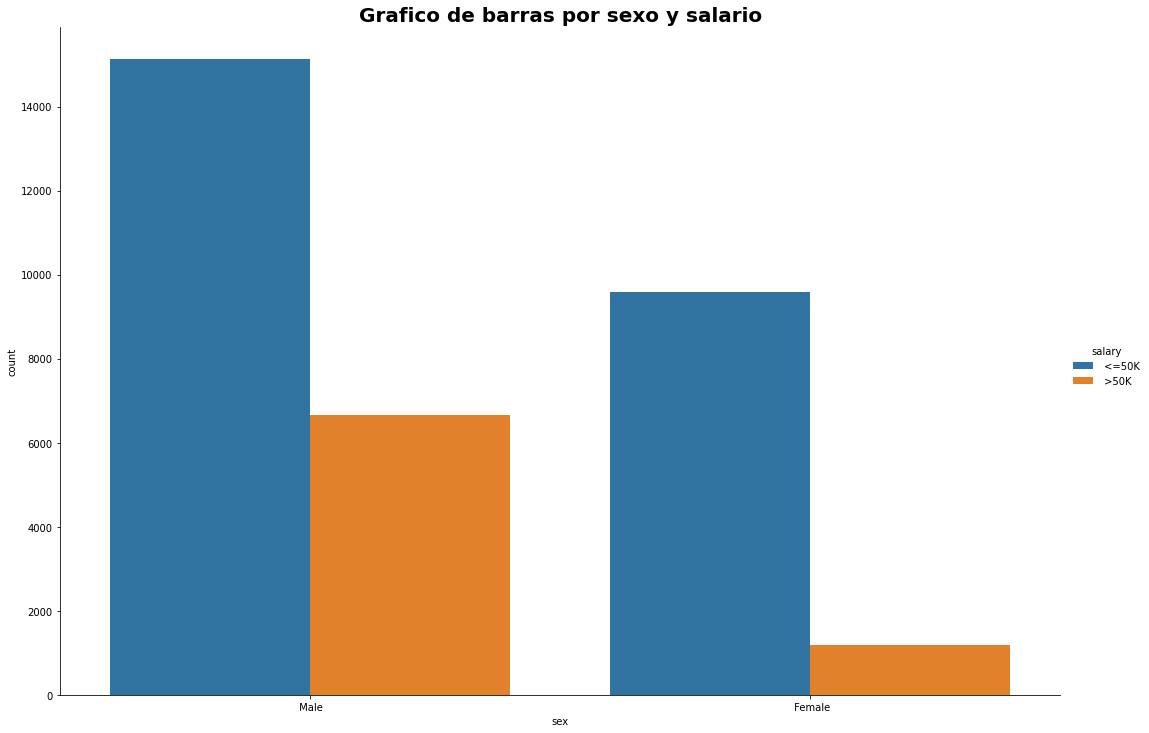

In [633]:
#como se evidencia en la grafica hay mas hombres que mujeres que ganan 50 mil dolares
plt.figure(figsize=(10,10))
sns.catplot('sex',data=df,kind='count',height=10,aspect=1.5,hue='salary')
plt.title('Grafico de barras por sexo y salario',fontweight='bold',fontname='Times New Roman',fontsize=20)
plt.show()

# **Columnas Numericas**

In [634]:
columna_numerica

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [635]:
import warnings

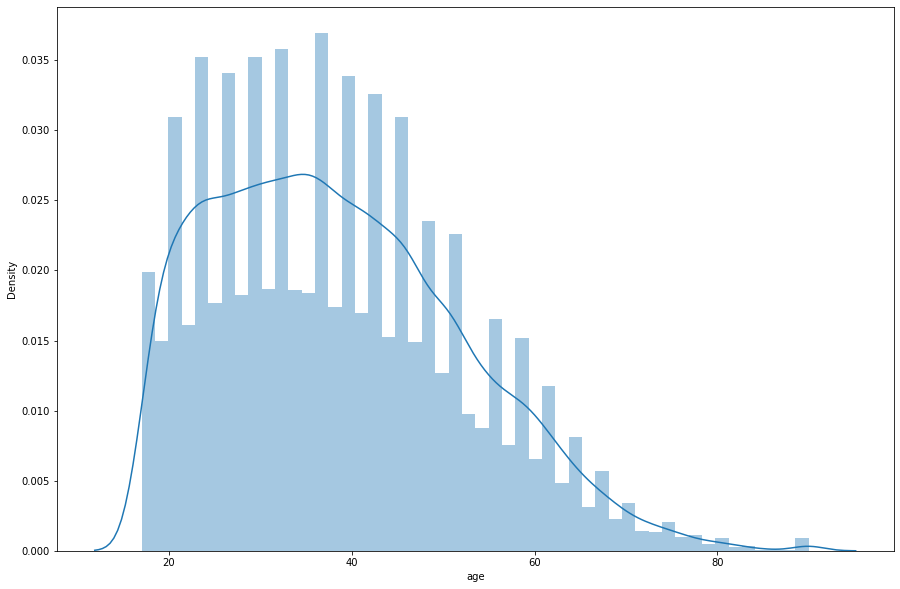

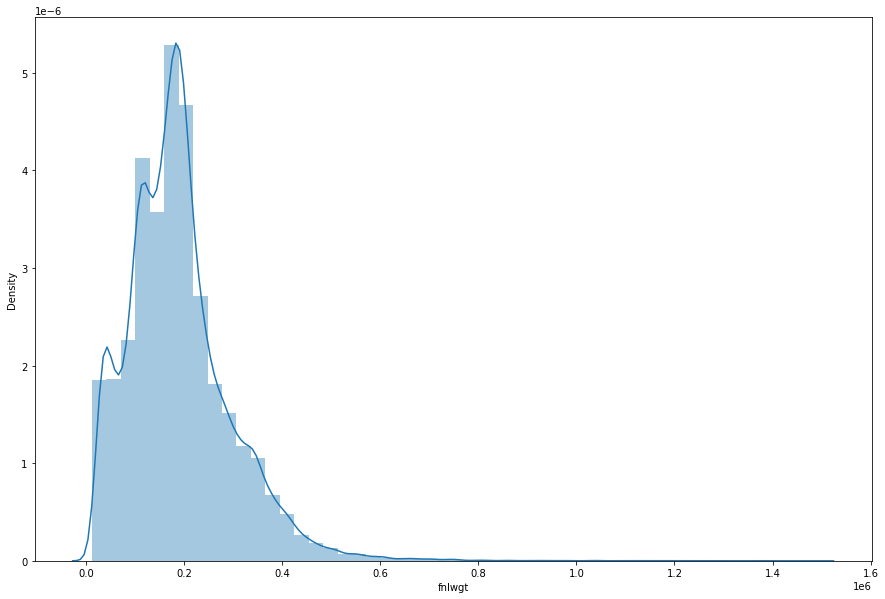

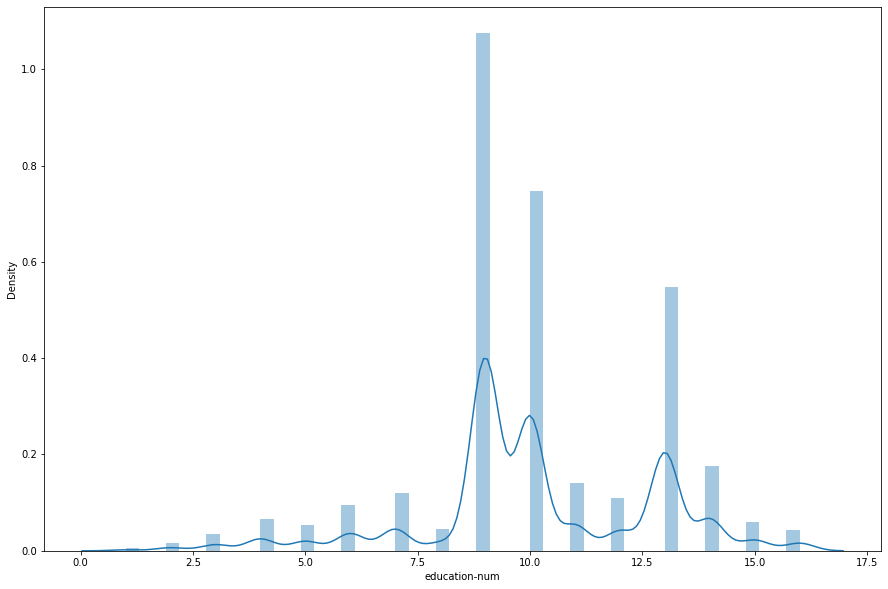

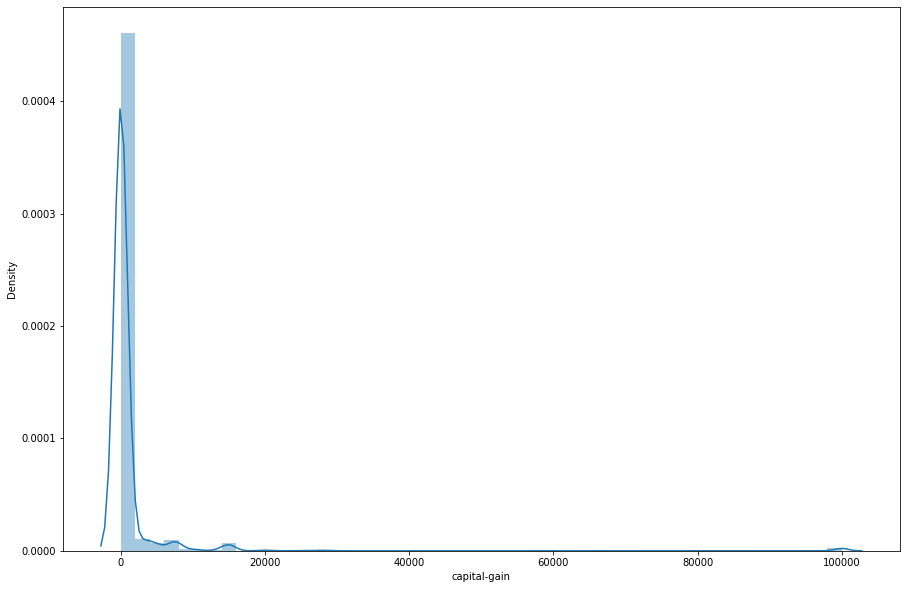

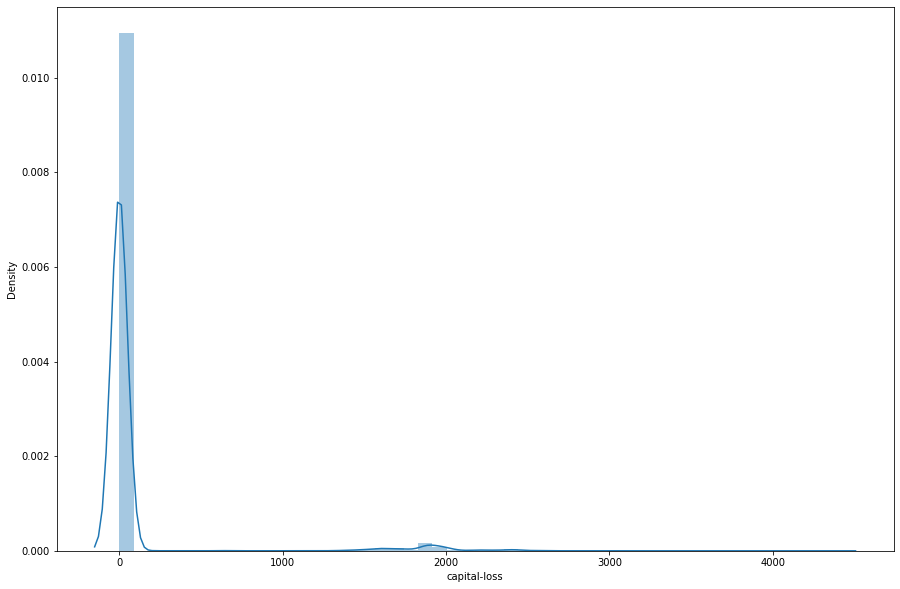

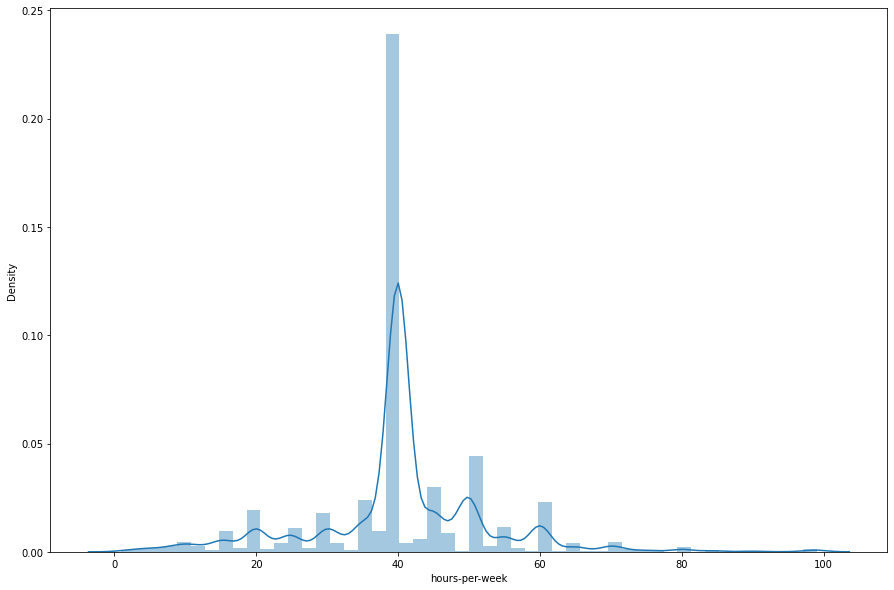

In [636]:
for x in range(len(columna_numerica)):
  plt.figure(figsize=(15,10))
  sns.distplot(df[columna_numerica[x]])
plt.show()

In [637]:
#varianza de las columna numericas
df.loc[:,columna_numerica].var()

age               1.860614e+02
fnlwgt            1.114080e+10
education-num     6.618890e+00
capital-gain      5.454254e+07
capital-loss      1.623769e+05
hours-per-week    1.524590e+02
dtype: float64

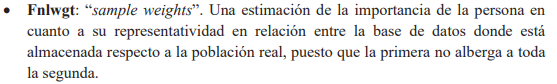

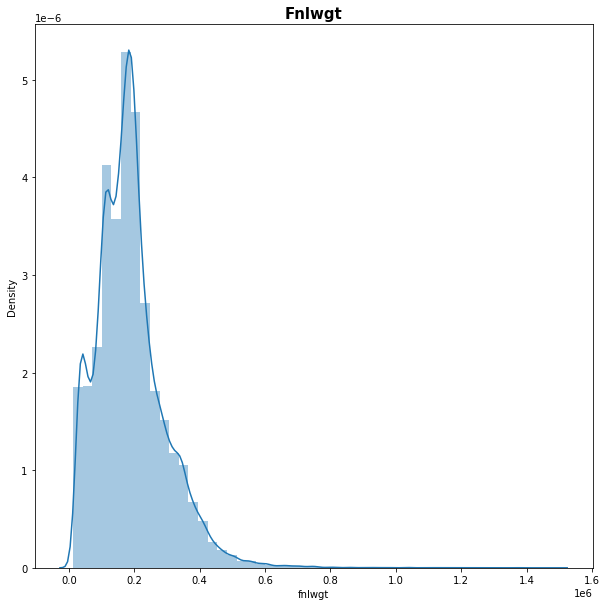

In [638]:
plt.figure(figsize=(10,10))
sns.distplot(df['fnlwgt'])
plt.title('Fnlwgt',fontweight='bold',fontname='Times New Roman',fontsize=15)
plt.show()

Vemos que hay una gran cantidad de valores atípicos aquí. Nuestra mediana se encuentra entre el lado 0,2 * 10^6, pero muchos otros puntos cruzan nuestro percentil 75. Tendremos que tratar esta columna por valores atípicos.

In [639]:
import plotly.graph_objects as go

In [640]:
fig = go.Figure()
fig.add_trace(go.Box(x=df['fnlwgt']))
fig.update_layout(title='Box plot de fnlwgt')
fig.show()

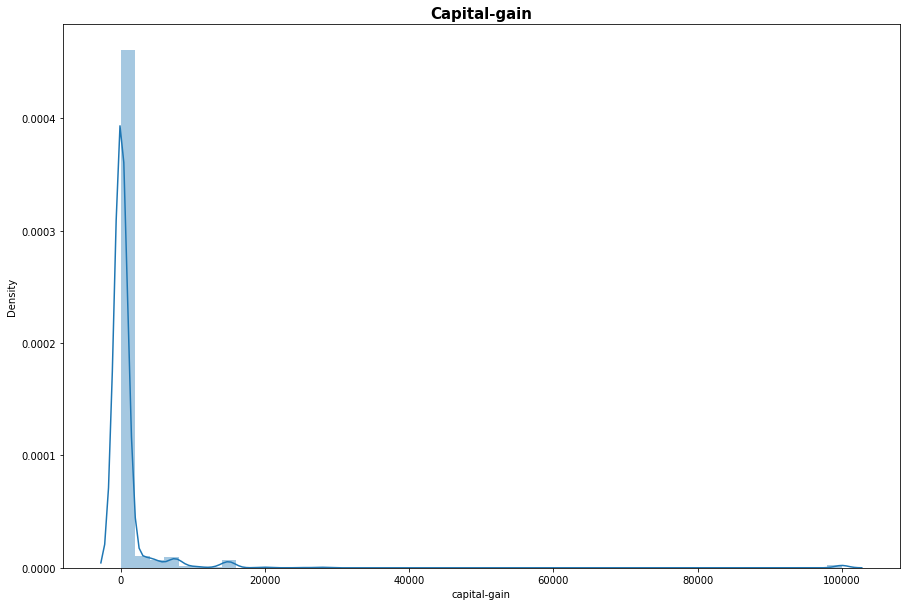

In [641]:
plt.figure(figsize=(15,10))
sns.distplot(df['capital-gain']) #capital ganado
plt.title('Capital-gain',fontweight='bold',fontname='Times New Roman',fontsize=15)
plt.show()

**Este gráfico es bastante interesante**

La mayoría de nuestros datos tienden hacia el lado cero del gráfico. Sin embargo, algunos de los datos están en el rango de 5k-20k y también hay algunos datos se encuentran en el rango de 100,000. Ahora bien, ese valor atípico justo allí eliminaría mucho nuestra varianza. Necesitamos lidiar con esos valores atípicos eventualmente o cuando intentemos hacer modelos más tarde, no podremos hacer una buena predicción.

In [642]:
fig=go.Figure()
fig.add_trace(go.Box(x=df['capital-gain'])) 
fig.update_layout(title='Box plot de Capital-Gain')
fig.show()

Eso parece que existe una gran cantidad de valores atípicos, ya que casi todos nuestros datos se centraron en 0, lo que implica que muy pocas personas obtuvieron una ganancia de capital. 

Eso ayudaría a explicar por qué tantas personas en la encuesta tenían un potencial de ingresos de <=50k.

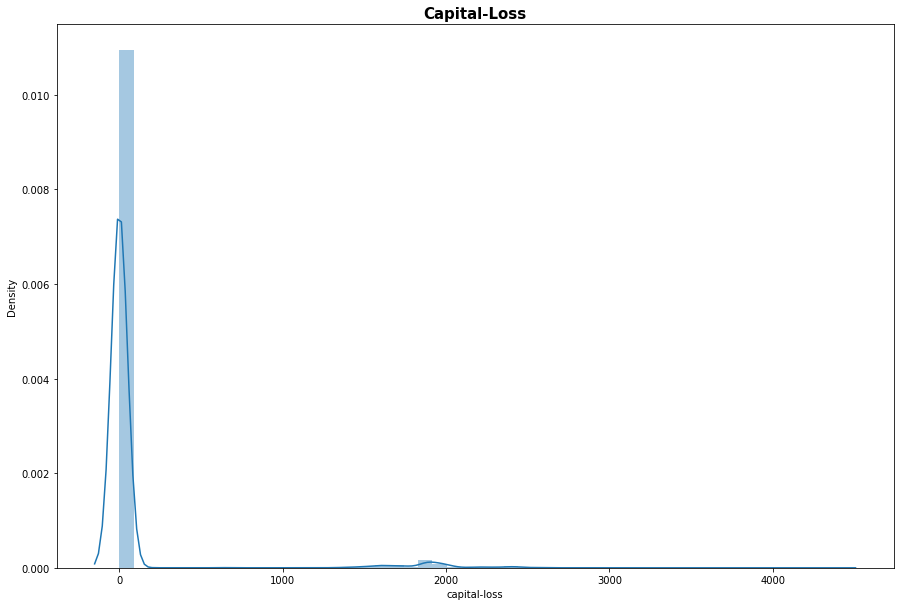

In [643]:
plt.figure(figsize=(15,10))
sns.distplot(df['capital-loss']) #capital perdido
plt.title('Capital-Loss',fontweight='bold',fontname='Times New Roman',fontsize=15)
plt.show()

In [644]:
fig=go.Figure()
fig.add_trace(go.Box(x=df['capital-loss']))
fig.update_layout(title='Box plot de Capital-Loss')
fig.show()

Como se evidencia en la grafica existe un gran cantidad de personas sin perida de capital. Esto, significa que las personas encuestados no esten realizando muchas inversiones. Lo que significa que no hubo grandes perdidas. Por ultimo, la perdida mas grande es de 4356.

In [645]:
columna_numerica

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

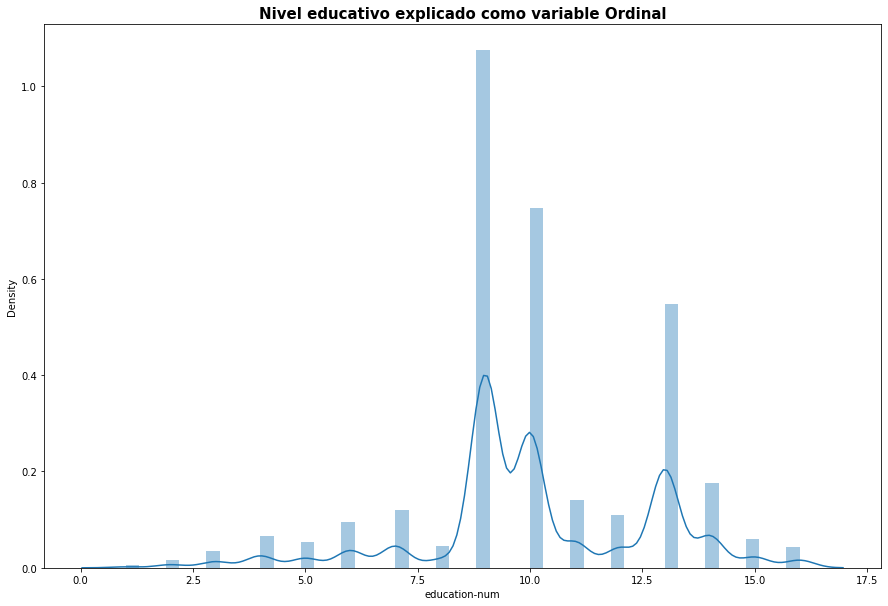

In [646]:
plt.figure(figsize=(15,10))
sns.distplot(df['education-num'])
plt.title('Nivel educativo explicado como variable Ordinal', fontweight='bold',fontname='Times New Roman',fontsize=15)
plt.show()

In [647]:
fig=go.Figure()
fig.add_trace(go.Box(x=df['education-num']))
fig.update_layout(title='Box plot de education-num')
fig.show()

Vemos que la mayoría de las personas se encuentran dentro del rango 9 y 12 con datos sesgados hacia la izquierda.

Muy pocas personas están muy por debajo de nuestro se encuentran entre el rango de 4 y 1

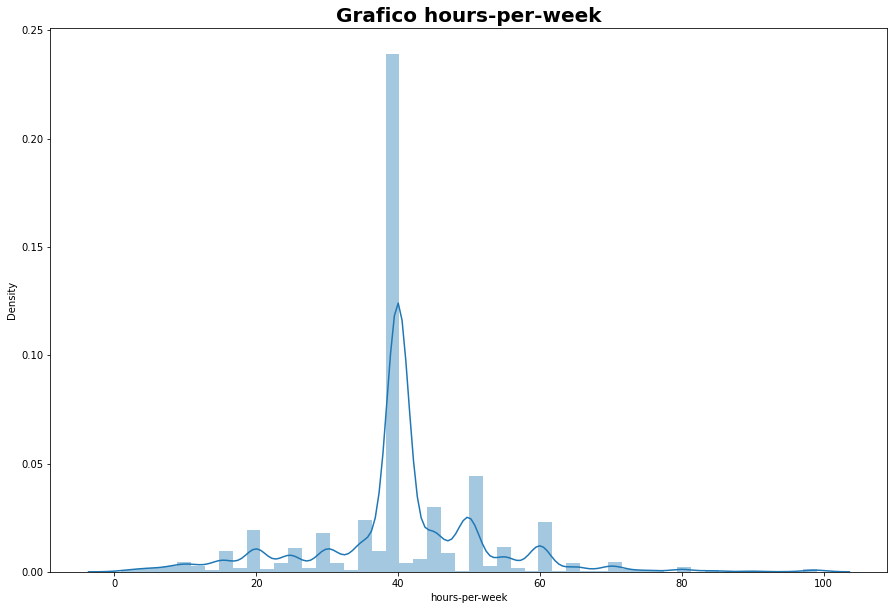

In [648]:
plt.figure(figsize=(15,10))
sns.distplot(df['hours-per-week'])
plt.title('Grafico hours-per-week',fontweight='bold',fontsize=20,fontname='Times New Roman')
plt.show()

In [649]:
fig=go.Figure()
fig.add_trace(go.Box(x=df['hours-per-week']))
fig.update_layout(title='Box plot Hours Per Week')
fig.show()

Segun la grafica se observa que la media indican que trabajan 40 horas a la semana, y se encuentra  entre 30 y 50. Sin embargo, existe gente trabaja mucho más tiempo y menos que eso. 

Existen personas que trabajan mas de 99 horas esto no puede decir que lo estan pasando mal o que el trabajo los apasiona

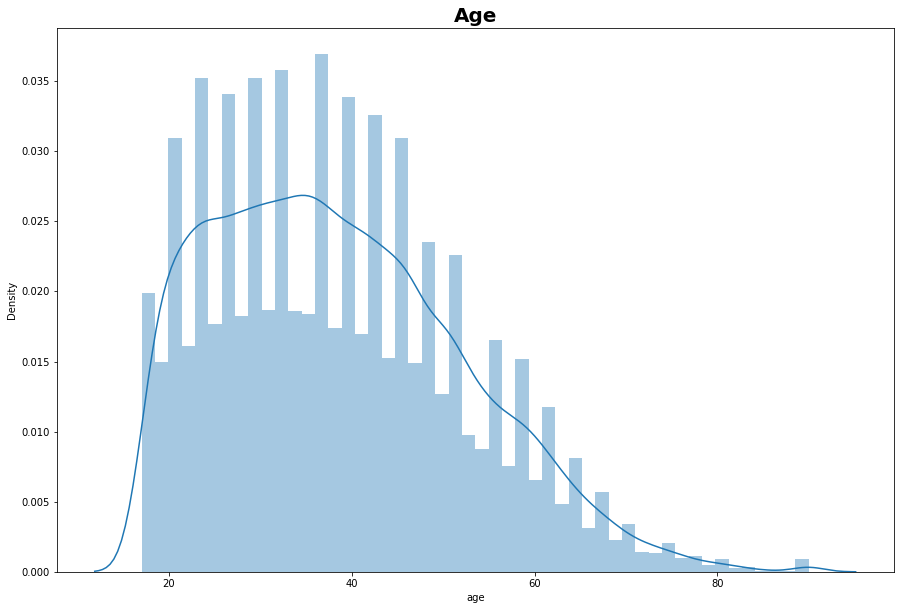

In [650]:
plt.figure(figsize=(15,10))
sns.distplot(df['age'])
plt.title('Age',fontweight='bold',fontsize=20,fontname='Times New Roman')
plt.show()

In [651]:
fig=go.Figure()
fig.add_trace(go.Box(x=df['age']))
fig.update_layout(title='Box plot Hours Age')
fig.show()

Se puede evidenciar que la mayoria de las personas se encuentran como minimo 17 y 80 años. Con una media de 37 años, por otro lado existe personas que tienen 90 años y siguen trabajando.

**Segun el grafico de correlacion:**

No existe ninguna correlacion directa entre ninguno de los datos numericos.

In [652]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


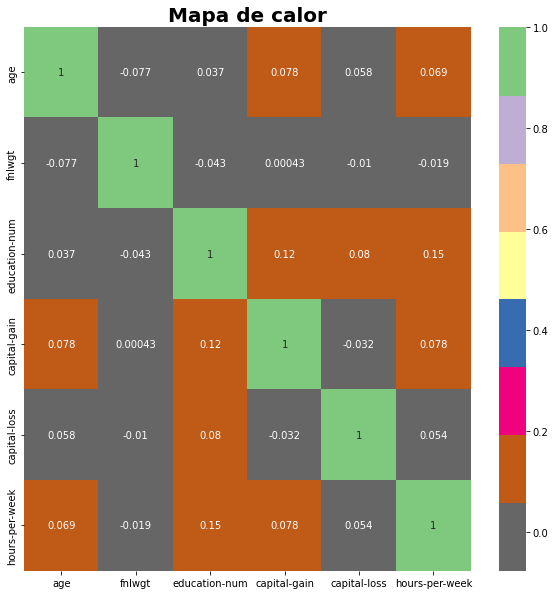

In [653]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.Accent_r)
plt.title('Mapa de calor',fontweight='bold',fontname='Times New Roman',fontsize=20)
plt.show()

# Preprocessing de los valores nulos

In [654]:
columnas_nulos=df.columns[df.isnull().any()]

In [655]:
df[columnas_nulos].isnull().sum()

Series([], dtype: float64)

In [656]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


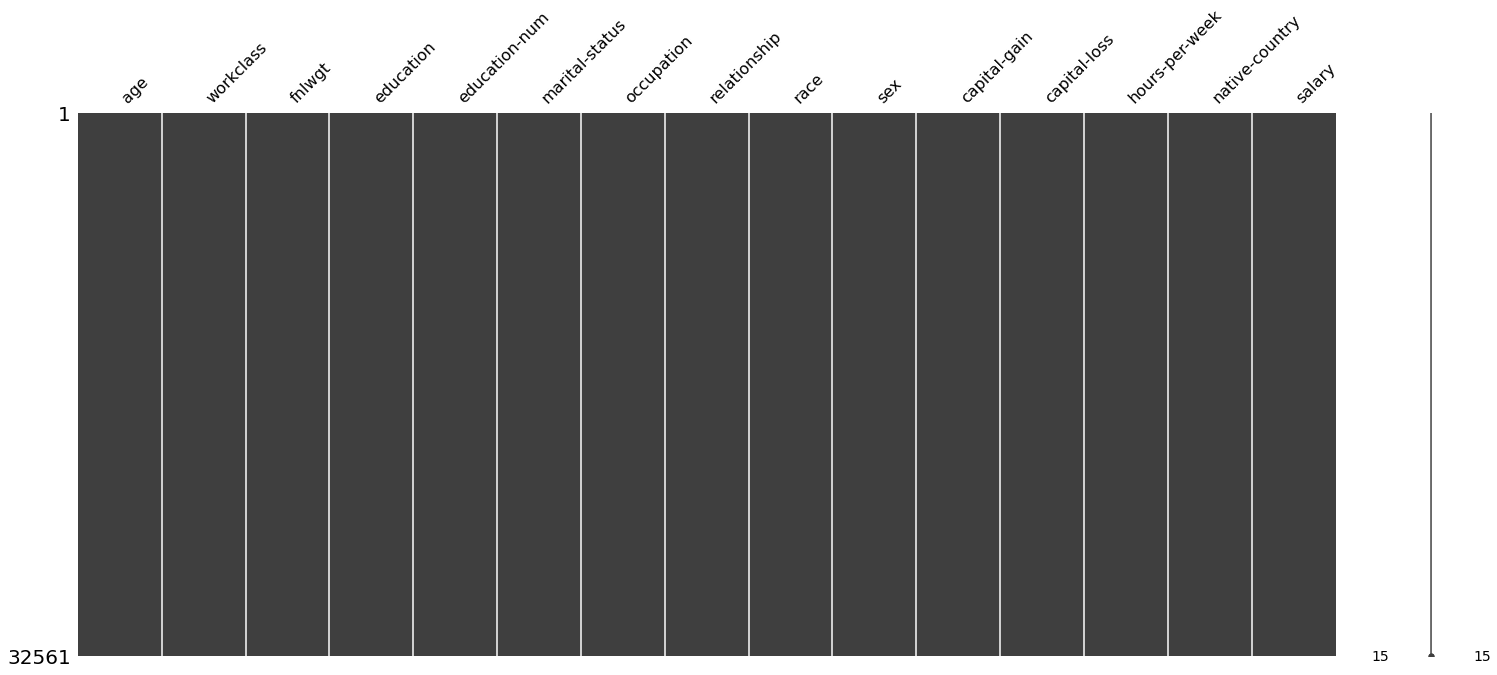

In [657]:
msno.matrix(df)

In [658]:
#df.to_excel('tabla_df.xlsx',index=False)

# Label Encoding


In [659]:
#Ahora que hemos tratado nuestros datos y limpiado nuestros valores nulos,
#podemos continuar y codificar nuestros datos.
for x in list(columnas_nulos):df[x].fillna(df[x].mode().values[0],inplace=True)

In [660]:
df[columna_categorica].head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [661]:
df[columna_categorica].sample(50)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
7937,Private,Some-college,Never-married,Other-service,Own-child,White,Female,United-States,<=50K
10483,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
30270,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
13772,Private,Bachelors,Married-civ-spouse,Sales,Husband,White,Male,United-States,<=50K
30489,Private,HS-grad,Never-married,Transport-moving,Not-in-family,White,Male,United-States,<=50K
19396,Private,Assoc-voc,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
31306,State-gov,Masters,Married-spouse-absent,Exec-managerial,Unmarried,White,Female,United-States,>50K
17353,Private,Some-college,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,United-States,<=50K
29237,Private,Some-college,Never-married,Sales,Other-relative,White,Male,United-States,<=50K
24392,Private,HS-grad,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [662]:
#preprocessing
from sklearn.preprocessing import LabelEncoder

In [663]:
label_encoder=LabelEncoder()
encoded_df=df
for x in columna_categorica:
  encoded_df[x]=label_encoder.fit_transform(df[x])
encoded_df[columna_categorica].head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,7,9,4,1,1,4,1,39,0
1,6,9,2,4,0,4,1,39,0
2,4,11,0,6,1,4,1,39,0
3,4,1,2,6,0,2,1,39,0
4,4,9,2,10,5,2,0,5,0


In [664]:
encoded_df[columna_categorica].sample(50)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
975,4,15,4,12,1,4,0,39,0
3921,4,1,0,3,1,4,1,39,0
1496,4,1,0,12,1,4,1,39,1
2106,4,11,2,3,0,4,1,39,1
10572,4,11,4,4,3,4,1,39,0
30004,4,15,4,8,3,4,1,39,0
24698,4,13,2,7,0,4,1,26,0
5386,7,11,2,4,0,4,1,39,0
22035,4,11,2,14,0,0,1,39,1
30772,4,15,4,12,3,4,0,39,0


**Scaling the data**

Por lo general, realizaremos varios tipos de escalado y veremos cuál funciona mejor en el conjunto de datos.

En este caso usaremos:

**1.**   **minmax scaler**




In [665]:
from sklearn.preprocessing import MinMaxScaler

In [666]:
min_max_scaler = MinMaxScaler()

In [667]:
encoded_df.columns.values

array(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'], dtype=object)

In [668]:
encoded_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [669]:
scaled_encoded_df=pd.DataFrame()
columna_valores=encoded_df.columns.values
columna_valores=columna_valores[:-1]
print(columna_valores[-1])

native-country


In [670]:
columna_valores

array(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype=object)

In [671]:
scaled_values=min_max_scaler.fit_transform(encoded_df[columna_valores])
scaled_encoded_adult_data = pd.DataFrame(encoded_df[columna_valores])

In [672]:
scaled_encoded_adult_data.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
4146,38,4,177305,11,9,2,3,0,4,1,0,0,45,39
10299,48,4,161187,11,9,4,1,1,4,0,2463,0,40,39
23077,56,2,255406,11,9,0,4,1,4,0,0,0,40,39
2254,63,5,215833,11,9,2,4,0,4,1,0,0,40,39
13397,49,2,177114,12,14,0,10,1,4,0,0,0,60,39


In [673]:
for i in range(len(columna_valores)):
    scaled_encoded_adult_data[columna_valores[i]] = scaled_values[:,i]
    
scaled_encoded_adult_data['salary'] = encoded_df['salary']
scaled_encoded_adult_data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
15052,0.273973,0.500,0.020211,0.733333,0.533333,0.000000,0.285714,0.2,1.0,1.0,0.00000,0.0000,0.346939,0.951220,0
21602,0.383562,0.500,0.096455,0.800000,0.866667,0.333333,0.285714,0.0,0.5,1.0,0.00000,0.0000,0.397959,0.951220,1
672,0.000000,0.750,0.242061,0.066667,0.400000,0.666667,0.357143,0.6,1.0,1.0,0.00000,0.0000,0.091837,0.951220,0
21456,0.342466,0.500,0.134466,0.800000,0.866667,0.000000,0.928571,0.8,0.5,0.0,0.04687,0.0000,0.346939,0.951220,1
1798,0.452055,0.125,0.100097,0.733333,0.533333,0.333333,0.071429,0.0,1.0,1.0,0.00000,0.0000,0.397959,0.951220,1
20526,0.123288,0.500,0.148974,1.000000,0.600000,0.666667,0.071429,0.6,1.0,0.0,0.00000,0.0000,0.397959,0.951220,0
22356,0.027397,0.500,0.038642,1.000000,0.600000,0.666667,0.571429,0.6,1.0,0.0,0.00000,0.0000,0.265306,0.951220,0
7792,0.273973,0.500,0.136322,0.533333,0.666667,0.333333,0.714286,0.0,1.0,1.0,0.00000,0.0000,0.397959,0.585366,0
17975,0.054795,0.500,0.136548,0.066667,0.400000,0.500000,0.428571,0.6,1.0,1.0,0.00000,0.4045,0.397959,0.146341,0
6013,0.191781,0.625,0.082569,0.533333,0.666667,0.000000,0.857143,0.2,1.0,1.0,0.00000,0.0000,0.397959,0.951220,0


In [674]:
scaled_encoded_adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  float64
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  float64
 4   education-num   32561 non-null  float64
 5   marital-status  32561 non-null  float64
 6   occupation      32561 non-null  float64
 7   relationship    32561 non-null  float64
 8   race            32561 non-null  float64
 9   sex             32561 non-null  float64
 10  capital-gain    32561 non-null  float64
 11  capital-loss    32561 non-null  float64
 12  hours-per-week  32561 non-null  float64
 13  native-country  32561 non-null  float64
 14  salary          32561 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 3.7 MB


In [675]:
scaled_encoded_adult_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,0.295639,0.186855,0.0,0.150685,0.273973,0.424658,1.0
workclass,32561.0,0.483612,0.181995,0.0,0.500000,0.500000,0.500000,1.0
fnlwgt,32561.0,0.120545,0.071685,0.0,0.071679,0.112788,0.152651,1.0
education,32561.0,0.686547,0.258018,0.0,0.600000,0.733333,0.800000,1.0
education-num,32561.0,0.605379,0.171515,0.0,0.533333,0.600000,0.733333,1.0
marital-status,32561.0,0.435306,0.251037,0.0,0.333333,0.333333,0.666667,1.0
occupation,32561.0,0.469481,0.302061,0.0,0.214286,0.500000,0.714286,1.0
relationship,32561.0,0.289272,0.321354,0.0,0.000000,0.200000,0.600000,1.0
race,32561.0,0.916464,0.212201,0.0,1.000000,1.000000,1.000000,1.0
sex,32561.0,0.669205,0.470506,0.0,0.000000,1.000000,1.000000,1.0


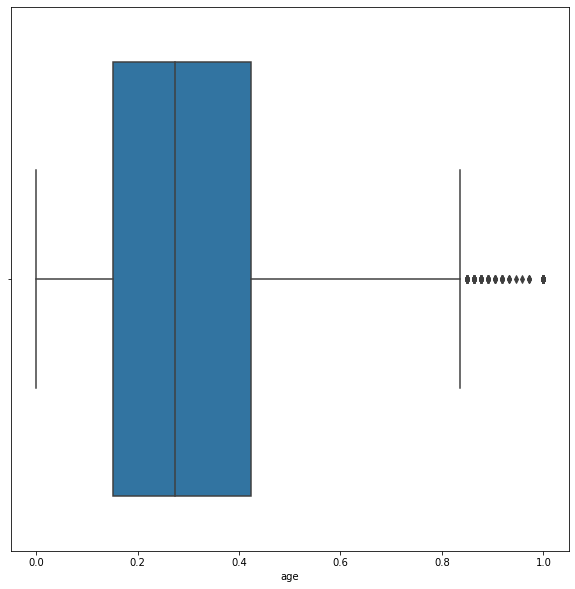

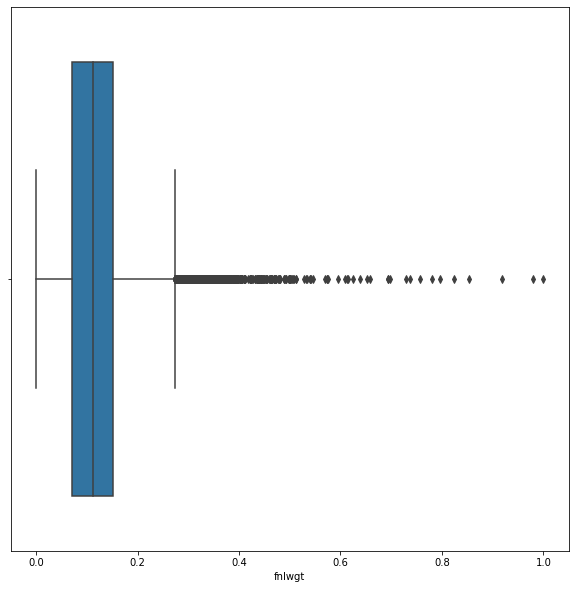

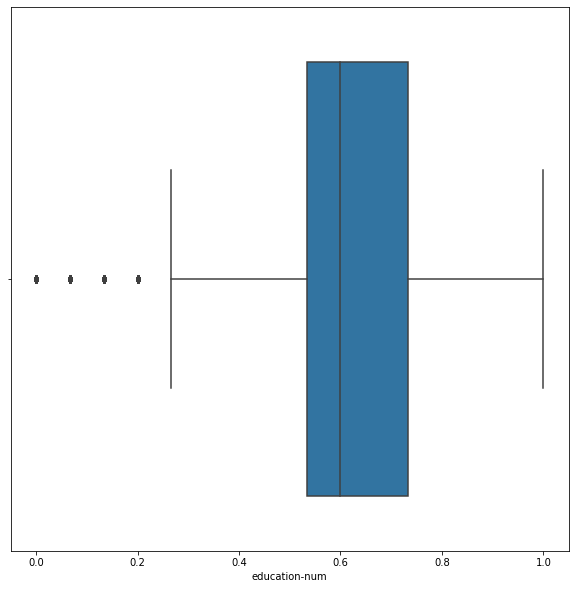

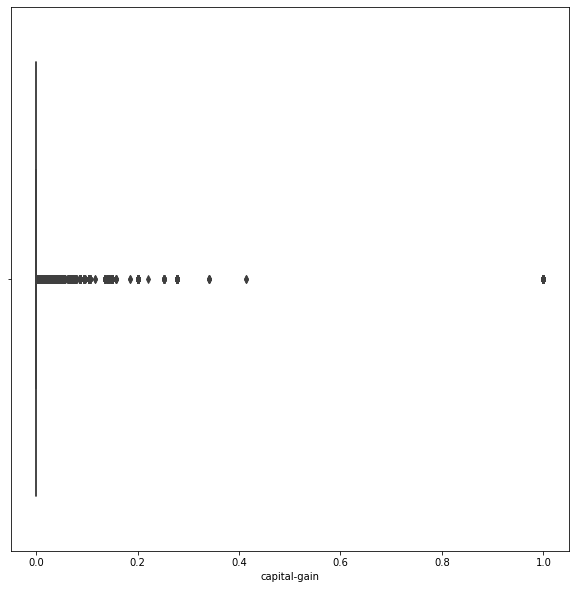

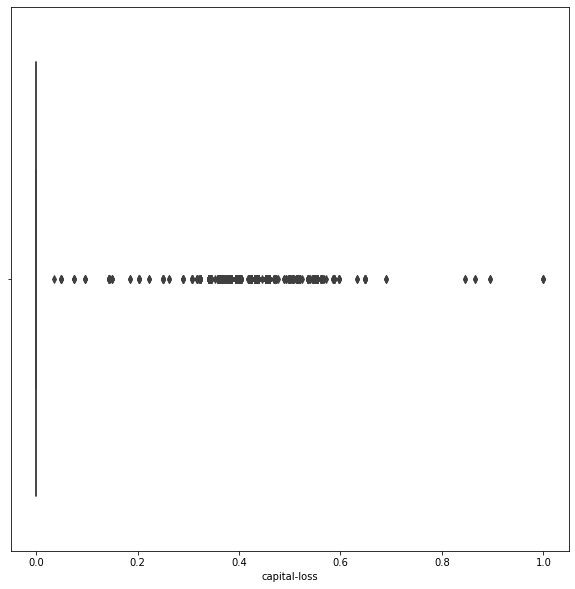

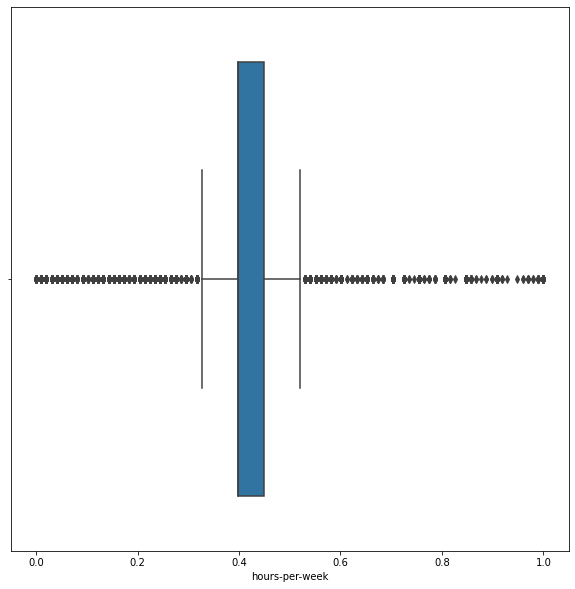

In [676]:
for x in range (len(columna_numerica)):
  plt.figure(figsize=(10,10))
  sns.boxplot(scaled_encoded_adult_data[columna_numerica[x]])
plt.show()

Como podemos ver en los gráficos anteriores, el Scaling no hace nada a la distribución y no se ocupa de los valores atípicos. Por ese motivo tenemos que cuidar los valores atípicos. Si las columnas son continuas, reemplazamos los valores atípicos con el valor de las medianas y si son categóricas, reemplazamos los valores atípicos con la moda. 

Ya hemos establecido las columnas numéricas y categóricas. Por lo tanto, será más fácil para nosotros tratar con ellos ahora.

In [677]:
scaled_encoded_adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,0.301370,0.875,0.044302,0.600000,0.800000,0.666667,0.071429,0.2,1.0,1.0,0.02174,0.0,0.397959,0.951220,0
1,0.452055,0.750,0.048238,0.600000,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.00000,0.0,0.122449,0.951220,0
2,0.287671,0.500,0.138113,0.733333,0.533333,0.000000,0.428571,0.2,1.0,1.0,0.00000,0.0,0.397959,0.951220,0
3,0.493151,0.500,0.151068,0.066667,0.400000,0.333333,0.428571,0.0,0.5,1.0,0.00000,0.0,0.397959,0.951220,0
4,0.150685,0.500,0.221488,0.600000,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.00000,0.0,0.397959,0.121951,0


In [678]:
def outlier_detector(datacolumn):
  sorted(datacolumn)
  Q1,Q3=np.percentile(datacolumn,[25,75])
  IQR=Q3-Q1
  lower_bound=Q1-(1.5*IQR)
  upper_bound=Q3+(1.5*IQR)
  return lower_bound,upper_bound

In [679]:
lowerbound,upperbound=outlier_detector(scaled_encoded_adult_data['age'])
lowerbound,upperbound

(-0.2602739726027397, 0.8356164383561644)

In [680]:
scaled_encoded_adult_data['age']

0        0.301370
1        0.452055
2        0.287671
3        0.493151
4        0.150685
           ...   
32556    0.136986
32557    0.315068
32558    0.561644
32559    0.068493
32560    0.479452
Name: age, Length: 32561, dtype: float64

In [681]:
scaled_encoded_adult_data.shape

(32561, 15)

***Este código de Python filtra las filas del DataFrame scaled_encoded_adult_data que cumplan con una de dos condiciones:***


**La primera condición es que la columna "age" sea menor que el valor de "lowerbound", y la segunda condición es que la columna "age" sea mayor que el valor de "upperbound"**


**El resultado de este filtro es un nuevo DataFrame que contiene solamente las filas de scaled_encoded_adult_data que satisfacen las condiciones especificadas**


**En resumen, este código se utiliza para eliminar las filas de scaled_encoded_adult_data que tienen valores de edad que caen fuera del rango definido por "lowerbound" y "upperbound"**

In [682]:
scaled_encoded_adult_data[(scaled_encoded_adult_data.age < lowerbound) | (scaled_encoded_adult_data.age > upperbound)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
74,0.849315,0.50,0.076377,1.000000,0.600000,0.333333,0.714286,0.4,1.0,1.0,0.00000,0.000000,0.193878,0.951220,0
222,1.000000,0.50,0.026799,0.733333,0.533333,0.666667,0.571429,0.2,0.5,1.0,0.00000,0.506428,0.397959,0.951220,0
430,0.863014,0.00,0.064844,0.733333,0.533333,1.000000,0.000000,0.2,1.0,1.0,0.00000,0.000000,0.234694,0.951220,0
918,0.876712,0.75,0.084064,0.733333,0.533333,0.333333,0.285714,0.0,1.0,1.0,0.00000,0.000000,0.295918,0.951220,0
1040,1.000000,0.50,0.084713,0.733333,0.533333,0.666667,0.571429,0.2,1.0,0.0,0.00000,0.000000,0.397959,0.951220,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32277,1.000000,0.50,0.204740,0.733333,0.533333,1.000000,0.071429,0.8,1.0,0.0,0.00000,0.000000,0.244898,0.951220,0
32367,1.000000,0.25,0.137399,0.333333,0.200000,0.333333,0.785714,0.0,1.0,1.0,0.02653,0.000000,0.397959,0.951220,0
32459,0.931507,0.50,0.058629,0.600000,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.00000,0.000000,0.020408,0.756098,0
32494,0.890411,0.00,0.265974,0.733333,0.533333,0.666667,0.000000,0.2,1.0,1.0,0.00000,0.000000,0.020408,0.951220,0


In [683]:
scaled_encoded_adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,0.301370,0.875,0.044302,0.600000,0.800000,0.666667,0.071429,0.2,1.0,1.0,0.02174,0.0,0.397959,0.951220,0
1,0.452055,0.750,0.048238,0.600000,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.00000,0.0,0.122449,0.951220,0
2,0.287671,0.500,0.138113,0.733333,0.533333,0.000000,0.428571,0.2,1.0,1.0,0.00000,0.0,0.397959,0.951220,0
3,0.493151,0.500,0.151068,0.066667,0.400000,0.333333,0.428571,0.0,0.5,1.0,0.00000,0.0,0.397959,0.951220,0
4,0.150685,0.500,0.221488,0.600000,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.00000,0.0,0.397959,0.121951,0


In [684]:
scaled_encoded_adult_data.shape

(32561, 15)

**Columnas Numericas**

In [685]:
nuevas_columnas=columna_numerica.copy()
nuevas_columnas.remove('capital-gain') #Columna escasa, no debe ser tratada
nuevas_columnas.remove('capital-loss') #Columna escasa, no debe ser tratada

In [686]:
nuevas_columnas

['age', 'fnlwgt', 'education-num', 'hours-per-week']

In [687]:
tratado_scaled_encoded_adult_data=scaled_encoded_adult_data.copy()

In [688]:
tratado_scaled_encoded_adult_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

Este código de Python utiliza la función outlier_detector para encontrar los valores atípicos (outliers) en cada columna del DataFrame treated_scaled_encoded_data, y luego reemplaza estos valores con la mediana de la columna correspondiente.

El bucle for itera a través de cada columna del DataFrame, y para cada columna se calculan el valor mínimo (lower_bound) y el valor máximo (upper_bound) para identificar los valores atípicos. Estos valores se obtienen mediante la llamada a la función outlier_detector definida en otro lugar del código.

Luego, se calcula la mediana de la columna correspondiente usando la función median(), y se almacena en la variable median.

La línea final de código utiliza la función np.where para reemplazar los valores atípicos por la mediana de la columna correspondiente. Si el valor de la celda es menor que el valor mínimo o mayor que el valor máximo, se reemplaza con la mediana. Si el valor está dentro del rango normal, se deja sin cambios. El resultado final es el DataFrame treated_scaled_encoded_data con valores atípicos reemplazados por la mediana de la columna correspondiente.

In [689]:
for i in nuevas_columnas:
  lower_bound,upper_bound=outlier_detector(tratado_scaled_encoded_adult_data[i])
  median=tratado_scaled_encoded_adult_data[i].median()
  tratado_scaled_encoded_adult_data[i] = np.where((tratado_scaled_encoded_adult_data[i] < lower_bound) | 
                                            (tratado_scaled_encoded_adult_data[i] > upper_bound), median, tratado_scaled_encoded_adult_data[i])

In [690]:
print('{}:number of outliers:{}'.format(i,tratado_scaled_encoded_adult_data[
        (tratado_scaled_encoded_adult_data[i] < lower_bound) |
        (tratado_scaled_encoded_adult_data[i] > upper_bound)][i]))

hours-per-week:number of outliers:Series([], Name: hours-per-week, dtype: float64)


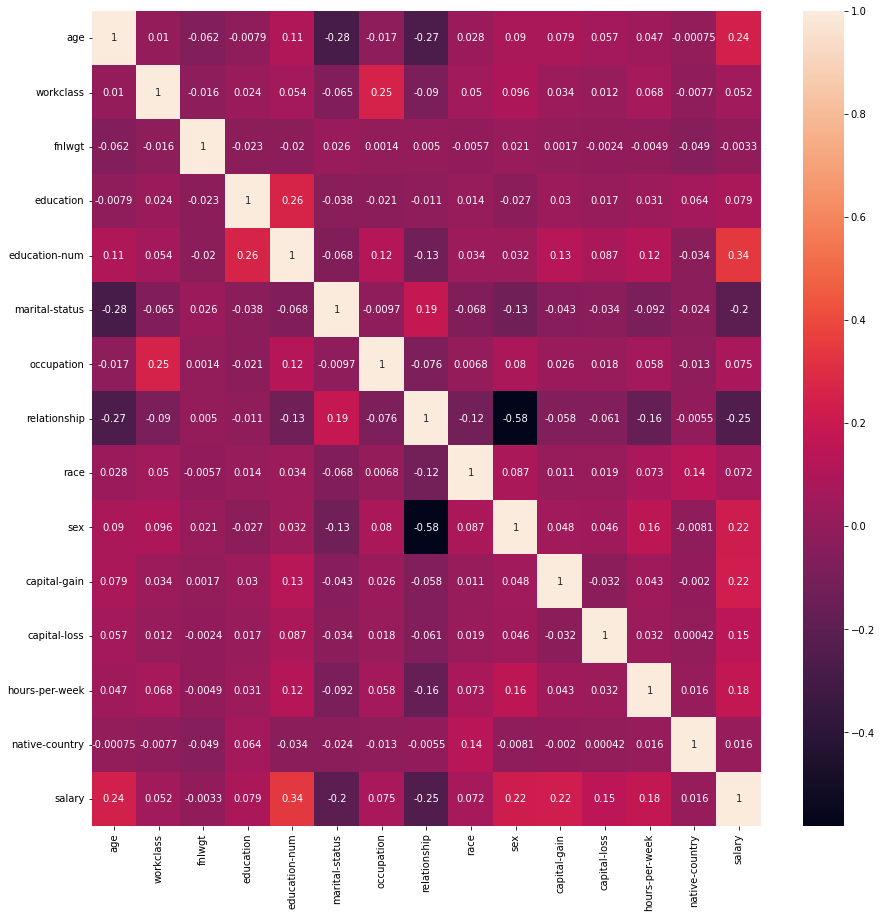

In [691]:
#Trazar mapa de correlacion
plt.figure(figsize=(15,15))
sns.heatmap(tratado_scaled_encoded_adult_data.corr(),annot=True)
plt.show()

Del mapa de calor vemos que ninguna de las columnas está correlacionada entre sí,
es decir, ninguno de ellos tiene un valor de correlación de >0,7 o <-0,7. Así que debemos encontrar otra forma de encontrar nuestras características.

In [692]:
print(columna)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')


In [693]:
columna[:-1]

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [694]:
features=columna[:-1]  #seleciona todas las variables
target=tratado_scaled_encoded_adult_data['salary']
print(features)
print(tratado_scaled_encoded_adult_data.shape)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
(32561, 15)


In [695]:
feature_df=tratado_scaled_encoded_adult_data[features]
print(target.head())
feature_df.head()

0    0
1    0
2    0
3    0
4    0
Name: salary, dtype: int64


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,0.875,0.044302,0.600000,0.800000,0.666667,0.071429,0.2,1.0,1.0,0.02174,0.0,0.397959,0.951220
1,0.452055,0.750,0.048238,0.600000,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.00000,0.0,0.397959,0.951220
2,0.287671,0.500,0.138113,0.733333,0.533333,0.000000,0.428571,0.2,1.0,1.0,0.00000,0.0,0.397959,0.951220
3,0.493151,0.500,0.151068,0.066667,0.400000,0.333333,0.428571,0.0,0.5,1.0,0.00000,0.0,0.397959,0.951220
4,0.150685,0.500,0.221488,0.600000,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.00000,0.0,0.397959,0.121951


In [696]:
feature_df.sample(50)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
17353,0.109589,0.500,0.062795,1.000000,0.600000,0.333333,0.428571,0.0,1.00,1.0,0.000000,0.000000,0.397959,0.951220
14063,0.260274,0.500,0.149814,0.600000,0.800000,0.333333,0.928571,0.0,1.00,1.0,0.000000,0.000000,0.397959,0.951220
31605,0.041096,0.000,0.242725,0.133333,0.466667,0.666667,0.000000,0.2,0.75,1.0,0.000000,0.367769,0.397959,0.951220
11601,0.123288,0.500,0.099189,0.266667,0.600000,0.666667,1.000000,0.2,1.00,1.0,0.000000,0.000000,0.397959,0.097561
13579,0.164384,0.875,0.014611,1.000000,0.600000,0.000000,0.071429,0.6,1.00,1.0,0.000000,0.000000,0.397959,0.951220
13052,0.287671,0.500,0.061919,0.600000,0.800000,0.833333,0.714286,0.8,1.00,1.0,0.000000,0.000000,0.397959,0.951220
20723,0.397260,0.500,0.117562,0.733333,0.533333,0.333333,0.857143,0.0,1.00,1.0,0.000000,0.000000,0.397959,0.951220
25395,0.671233,0.500,0.077577,1.000000,0.600000,0.333333,0.285714,0.0,1.00,1.0,0.000000,0.000000,0.448980,0.951220
18898,0.287671,0.500,0.156011,0.133333,0.466667,0.333333,0.214286,0.0,1.00,1.0,0.076881,0.000000,0.397959,0.951220
25248,0.383562,0.500,0.043050,0.533333,0.666667,1.000000,0.071429,0.2,0.25,0.0,0.000000,0.000000,0.397959,0.951220


# Train-validation-test splitting

In [697]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(feature_df,target,test_size=0.25,random_state=100)

In [698]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(24420, 14) (8141, 14) (24420,) (8141,)


# Construir Modelos de Machine Learning

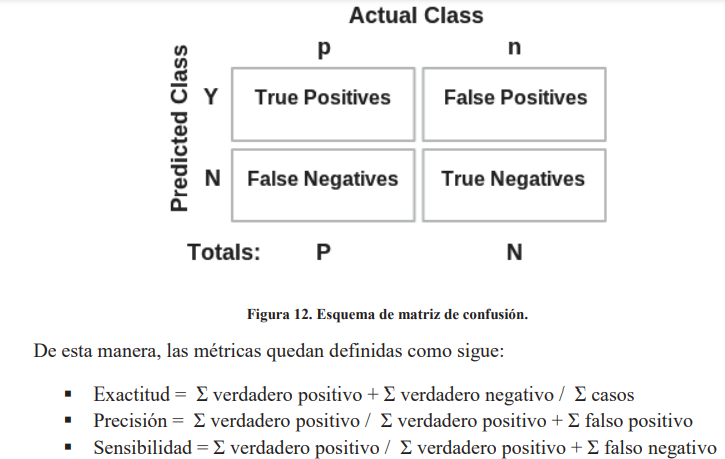

# **Logistic Regression**

In [699]:
from sklearn.linear_model import LogisticRegression

In [700]:
Logistic_regressor=LogisticRegression(max_iter=10000)

In [701]:
Logistic_regressor.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [702]:
logistic_regression_train_score=Logistic_regressor.score(X_train,y_train)
logistic_regression_test_score=Logistic_regressor.score(X_test,y_test)
print('Train Score:{0}\n Test Score: {1}'.format(logistic_regression_train_score.round(4),logistic_regression_test_score.round(4)))

Train Score:0.8221
 Test Score: 0.8286


In [703]:
logistic_prediction=Logistic_regressor.predict(X_test)

In [704]:
from sklearn.metrics import mean_squared_error
logistic_mse=mean_squared_error(y_test,logistic_prediction)
logistic_rmse=np.sqrt(logistic_mse)
print('MSE: {0}\n RMSE: {1}'.format(logistic_mse.round(4),logistic_rmse.round(4)))

MSE: 0.1714
 RMSE: 0.414


In [705]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
logistic_regression_accuracy=accuracy_score(logistic_prediction,y_test)
print(logistic_regression_accuracy.round(4))

0.8286


In [706]:
print(classification_report(y_test,logistic_prediction))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6180
           1       0.75      0.43      0.55      1961

    accuracy                           0.83      8141
   macro avg       0.80      0.69      0.72      8141
weighted avg       0.82      0.83      0.81      8141



In [707]:
matrix=confusion_matrix(y_test,logistic_prediction)
print(matrix)

[[5897  283]
 [1112  849]]


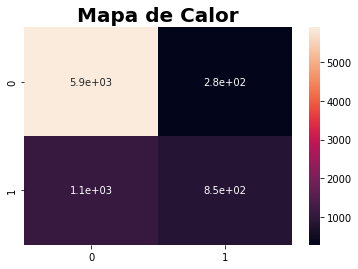

In [708]:
sns.heatmap(matrix,annot=True)
plt.title('Mapa de Calor',fontweight='bold',fontname='Times New Roman',fontsize=20)
plt.show()

In [709]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [710]:
roc_auc = roc_auc_score(y_test, logistic_prediction) # definición del cálculo del auc
print( "Area bajo la curva ROC: ", round(roc_auc,4), " ")

Area bajo la curva ROC:  0.6936  


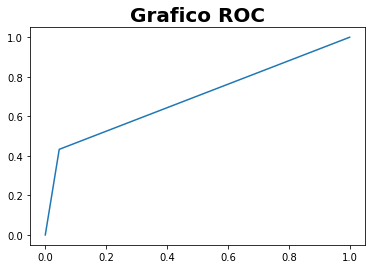

In [711]:
fpr, tpr,_ = roc_curve(y_test, logistic_prediction) # Función para armar la curva ROC
plt.title('Grafico ROC',fontweight='bold',fontsize=20,fontname='Times New Roman')
plt.plot(fpr, tpr, label="auc"+str(roc_auc))

# KNN Classifier

In [712]:
from sklearn.neighbors import KNeighborsClassifier

In [713]:
error_rate=[]
k_values = list(filter(lambda x: x%2==1, range(0,50)))
best_k = 0
for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
a=error_rate.index(np.min(error_rate))
print(a)

15


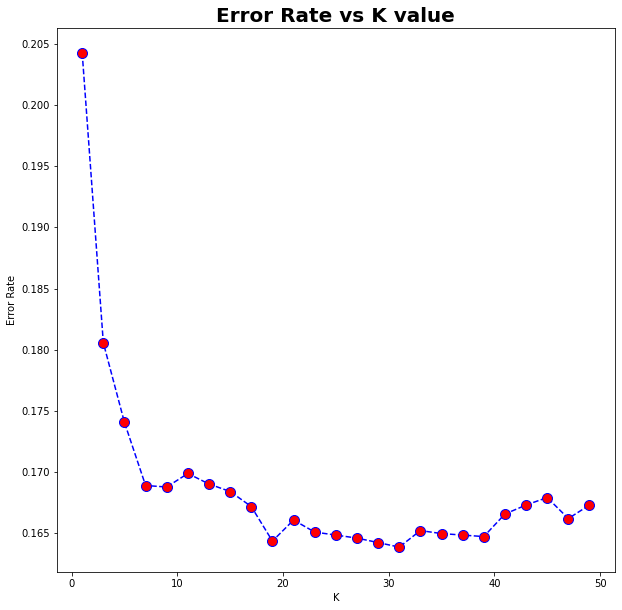

In [714]:
plt.figure(figsize=(10,10))
plt.plot(k_values,error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value', fontweight='bold',fontsize=20,fontname='Times New Roman')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

 **n_neighbors = a*2 + 1**

In [715]:
b=a*2+1
knn_classifier=KNeighborsClassifier(n_neighbors=b)
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=31)

In [716]:
knn_train_score=knn_classifier.score(X_train,y_train)
knn_test_score=knn_classifier.score(X_test,y_test)
print('Train Score: {0}\n Test Score: {1}'.format(knn_train_score.round(4),knn_test_score.round(4)))

Train Score: 0.8385
 Test Score: 0.8361


In [717]:
knn_prediction = knn_classifier.predict(X_test)

In [718]:
knn_classifier_mse=mean_squared_error(y_test,knn_prediction)
knn_classifier_rmse=np.sqrt(knn_classifier_mse)
print('MSE: {0}\n RMSE: {1}'.format(knn_classifier_mse.round(4),knn_classifier_rmse.round(4)))

MSE: 0.1639
 RMSE: 0.4048


In [719]:
knn_accuracy=accuracy_score(knn_prediction,y_test)
print(knn_accuracy.round(4))

0.8361


In [720]:
print(classification_report(y_test,knn_prediction))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6180
           1       0.71      0.55      0.62      1961

    accuracy                           0.84      8141
   macro avg       0.79      0.74      0.76      8141
weighted avg       0.83      0.84      0.83      8141



In [721]:
matrix=confusion_matrix(y_test,knn_prediction)
matrix

array([[5731,  449],
       [ 885, 1076]])

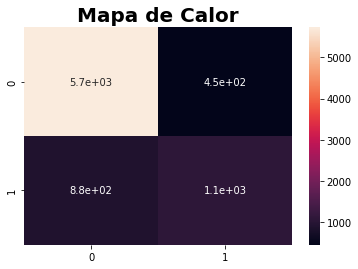

In [722]:
sns.heatmap(matrix,annot=True)
plt.title('Mapa de Calor',fontweight='bold',fontsize=20,fontname='Times New Roman')
plt.show()

In [723]:
roc_auc = roc_auc_score(y_test, knn_prediction) # definición del cálculo del auc
print( "Area bajo la curva ROC: ", round(roc_auc,4), " ")

Area bajo la curva ROC:  0.738  


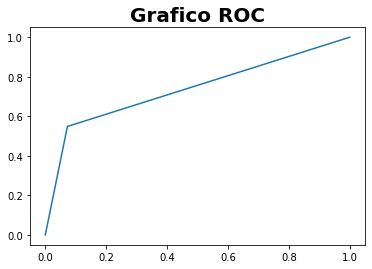

In [724]:
fpr, tpr,_ = roc_curve(y_test, knn_prediction) # Función para armar la curva ROC
plt.title('Grafico ROC',fontweight='bold',fontsize=20,fontname='Times New Roman')
plt.plot(fpr, tpr, label="auc"+str(roc_auc))

# Suport Vector Machine

In [725]:
from sklearn.svm import SVC

In [726]:
suport_vector_classifier=SVC(kernel='rbf')
suport_vector_classifier.fit(X_train, y_train)

SVC()

In [727]:
svc_train_score = suport_vector_classifier.score(X_train, y_train)
svc_test_score = suport_vector_classifier.score(X_test, y_test)

In [728]:
print('Train Score: {0}\n Test Score: {1}'.format(svc_train_score.round(4),svc_test_score.round(4)))

Train Score: 0.8437
 Test Score: 0.8456


In [729]:
suport_vector_classifier_prediction=suport_vector_classifier.predict(X_test)
svc_mse=mean_squared_error(y_test,suport_vector_classifier_prediction)
svc_rmse=np.sqrt(svc_mse)
print('MSE: {0}\n RMSE: {1}'.format(svc_mse.round(4),svc_rmse.round(4)))

MSE: 0.1544
 RMSE: 0.3929


In [730]:
svc_accuracy=accuracy_score(suport_vector_classifier_prediction,y_test)
print(svc_accuracy.round(4))

0.8456


In [731]:
print(classification_report(y_test,suport_vector_classifier_prediction))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6180
           1       0.77      0.52      0.62      1961

    accuracy                           0.85      8141
   macro avg       0.81      0.73      0.76      8141
weighted avg       0.84      0.85      0.83      8141



In [732]:
matrix=confusion_matrix(y_test,suport_vector_classifier_prediction)
matrix

array([[5874,  306],
       [ 951, 1010]])

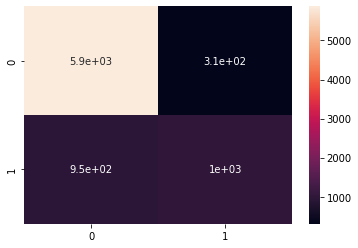

In [733]:
sns.heatmap(matrix,annot=True)

In [734]:
roc_auc = roc_auc_score(y_test, suport_vector_classifier_prediction) # definición del cálculo del auc
print( "Area bajo la curva ROC: ", round(roc_auc,4), " ")

Area bajo la curva ROC:  0.7328  


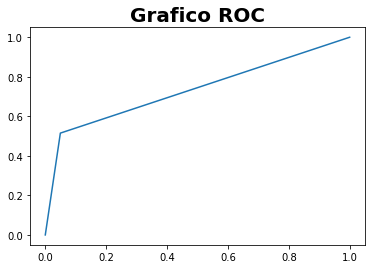

In [735]:
fpr, tpr,_ = roc_curve(y_test, suport_vector_classifier_prediction) # Función para armar la curva ROC
plt.title('Grafico ROC',fontweight='bold',fontsize=20,fontname='Times New Roman')
plt.plot(fpr, tpr, label="auc"+str(roc_auc))

# Decision Tree Classifier

In [736]:
from sklearn.tree import DecisionTreeClassifier

In [737]:
tree_classifier=DecisionTreeClassifier(min_impurity_decrease=0.05,min_samples_split=50)
tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier(min_impurity_decrease=0.05, min_samples_split=50)

In [738]:
tree_train_score=tree_classifier.score(X_train, y_train)
tree_test_score=tree_classifier.score(X_test,y_test)
print('Train Score: {0}\n Test Score: {1}'.format(tree_train_score.round(4),tree_test_score.round(4)))

Train Score: 0.7592
 Test Score: 0.7591


In [739]:
tree_prediction=tree_classifier.predict(X_test)

In [740]:
tree_mse=mean_squared_error(y_test,tree_prediction)
tree_rmse=np.sqrt(tree_mse)
print('MSE: {0}\n RMSE: {1}'.format(tree_mse.round(4),tree_rmse.round(4)))

MSE: 0.2409
 RMSE: 0.4908


In [741]:
tree_accuracy=accuracy_score(tree_prediction,y_test)
print(tree_accuracy.round(4))

0.7591


**Cross_Val_Score**

In [742]:
tree_cvs=DecisionTreeClassifier(min_impurity_decrease=0.05)
scores=cross_val_score(tree_cvs, feature_df, target, cv=5)

In [743]:
tree_cvs=tree_cvs.fit(X_train,y_train)
print ("Acurracy: ", tree_cvs.score(X_test,y_test))

Acurracy:  0.7591205011669329


In [744]:
print (scores.mean())

0.7591904454179904


# RandomForest Classifier

In [761]:
#modelos de conjunto para un mejor rendimiento
from sklearn.ensemble import RandomForestClassifier

In [762]:
Forest_cls=RandomForestClassifier(n_estimators=100,n_jobs=-1)
Forest_cls.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [763]:
forest_train_score=Forest_cls.score(X_train,y_train)
forest_test_score=Forest_cls.score(X_test,y_test)

In [764]:
print('Train Score: {0}\n Test Score: {1}'.format(forest_train_score.round(4),forest_test_score.round(4)))

Train Score: 0.9998
 Test Score: 0.8542


In [765]:
Forest_cls_predict=Forest_cls.predict(X_test)

In [766]:
Forest_cls_rme=mean_squared_error(y_test,Forest_cls_predict)
Forest_cls_rmse=np.sqrt(Forest_cls_rme)
print('MSE: {0}\n RMSE: {1}'.format(Forest_cls_rme.round(4),Forest_cls_rmse.round(4)))

MSE: 0.1458
 RMSE: 0.3818


In [767]:
Forest_cls_accuracy=accuracy_score(Forest_cls_predict,y_test)
print(Forest_cls_accuracy.round(4))

0.8542


**Cross_Val_Score**

In [768]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [769]:
Forest_cls = RandomForestClassifier(n_estimators=100,n_jobs=-1)
scores = cross_val_score(Forest_cls, feature_df, target, cv=5)

In [770]:
Forest_cls = Forest_cls.fit(X_train,y_train)
print ("Acurracy: ", Forest_cls.score(X_test,y_test))

Acurracy:  0.8538263112639725


In [771]:
print (scores.mean())

0.8548571115187882


# Comparando Modelos

In [785]:
list_1=[logistic_regression_accuracy.round(4),knn_accuracy.round(4),svc_accuracy.round(4),tree_accuracy.round(4),Forest_cls_accuracy.round(4)]

In [786]:
print(list_1)

[0.8286, 0.8361, 0.8456, 0.7591, 0.8542]


In [787]:

x_modelo=['logistic','knn','svc','tree','Forest']
x_modelo

['logistic', 'knn', 'svc', 'tree', 'Forest']

In [788]:
resultado_accuracy=list(zip(x_modelo,list_1))
print(resultado_accuracy)

[('logistic', 0.8286), ('knn', 0.8361), ('svc', 0.8456), ('tree', 0.7591), ('Forest', 0.8542)]


In [789]:
tabla=pd.DataFrame(resultado_accuracy,columns=['Método', 'Resultado'])
tabla=tabla.sort_values(by='Resultado',ascending=False)
tabla

,Método,Resultado
4,Forest,0.8542
2,svc,0.8456
1,knn,0.8361
0,logistic,0.8286
3,tree,0.7591


In [790]:
fig = px.bar(tabla, y='Resultado', x='Método', text_auto='.2s',
            title="El Acurracy de los Metodos")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

**En conclusion:**

Los mejores modelos de accuracy son el forest, svc y Knn